In [129]:
from mykalshi import session, transport, formatting, market, events, trading, communications, exchange
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import os

sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

In [132]:
# markets_data = market.get_all_markets()
# markets_df = pd.json_normalize(markets_data)
# filename = 'all_markets_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.csv'
# markets_df.to_csv(filename, index=False)
files = glob.glob("all_markets_*.csv")
filename_to_load = max(files, key=os.path.getctime) if files else None

# Load if found
if filename_to_load:
    markets_df = pd.read_csv(filename_to_load)
    print(f"Loaded: {filename_to_load}")
    display(markets_df)
else:
    print("No matching CSV files found.")

C:\Users\nicco\AppData\Local\Temp\ipykernel_536\3913729600.py:10: DtypeWarning: Columns (29,31,37,38,39,40,41,42,43,44,45,46,47,48,50,51,55,56,57,58,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  markets_df = pd.read_csv(filename_to_load)


Loaded: all_markets_2025-07-11-21-30-55.csv


,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate,volume_category
0,KXMLSGAME-25JUL16SJDAL-TIE,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
1,KXMLSGAME-25JUL16SJDAL-SJ,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,San Jose,San Jose,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
2,KXMLSGAME-25JUL16SJDAL-DAL,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,Dallas,Dallas,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
3,KXMLSGAME-25JUL16SDTOR-TOR,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,NaN,Toronto,Toronto,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
4,KXMLSGAME-25JUL16SDTOR-TIE,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,NaN,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140640,TEMP-21-T2.124,TEMP-21,binary,Will 2021 be the **hottest year on record**?,NaN,Above 2.124° C,2.124° C or below,2021-07-02T14:00:00Z,2022-01-10T00:00:00Z,2021-07-02T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
2140641,HOME-21JUN-T750,HOME-21JUN,binary,"Will new U.S. home sales be above 750,000?",>750K,"Above 750,000","750,000 or below",2021-06-30T14:00:00Z,2021-07-25T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000
2140642,GDP-21JUN30-T6.0,GDP-21JUN30,binary,Will real GDP increase by more than 6%?,>6%,Above 6%,6% or below,2021-06-30T14:00:00Z,2021-07-28T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000
2140643,TRDDEFCN-21MAY-T30,TRDDEFCN-21MAY,binary,Will the US trade deficit in goods with China ...,>$30bn,Above $30 billion,$30 billion or below,2021-06-30T14:00:00Z,2021-07-01T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000


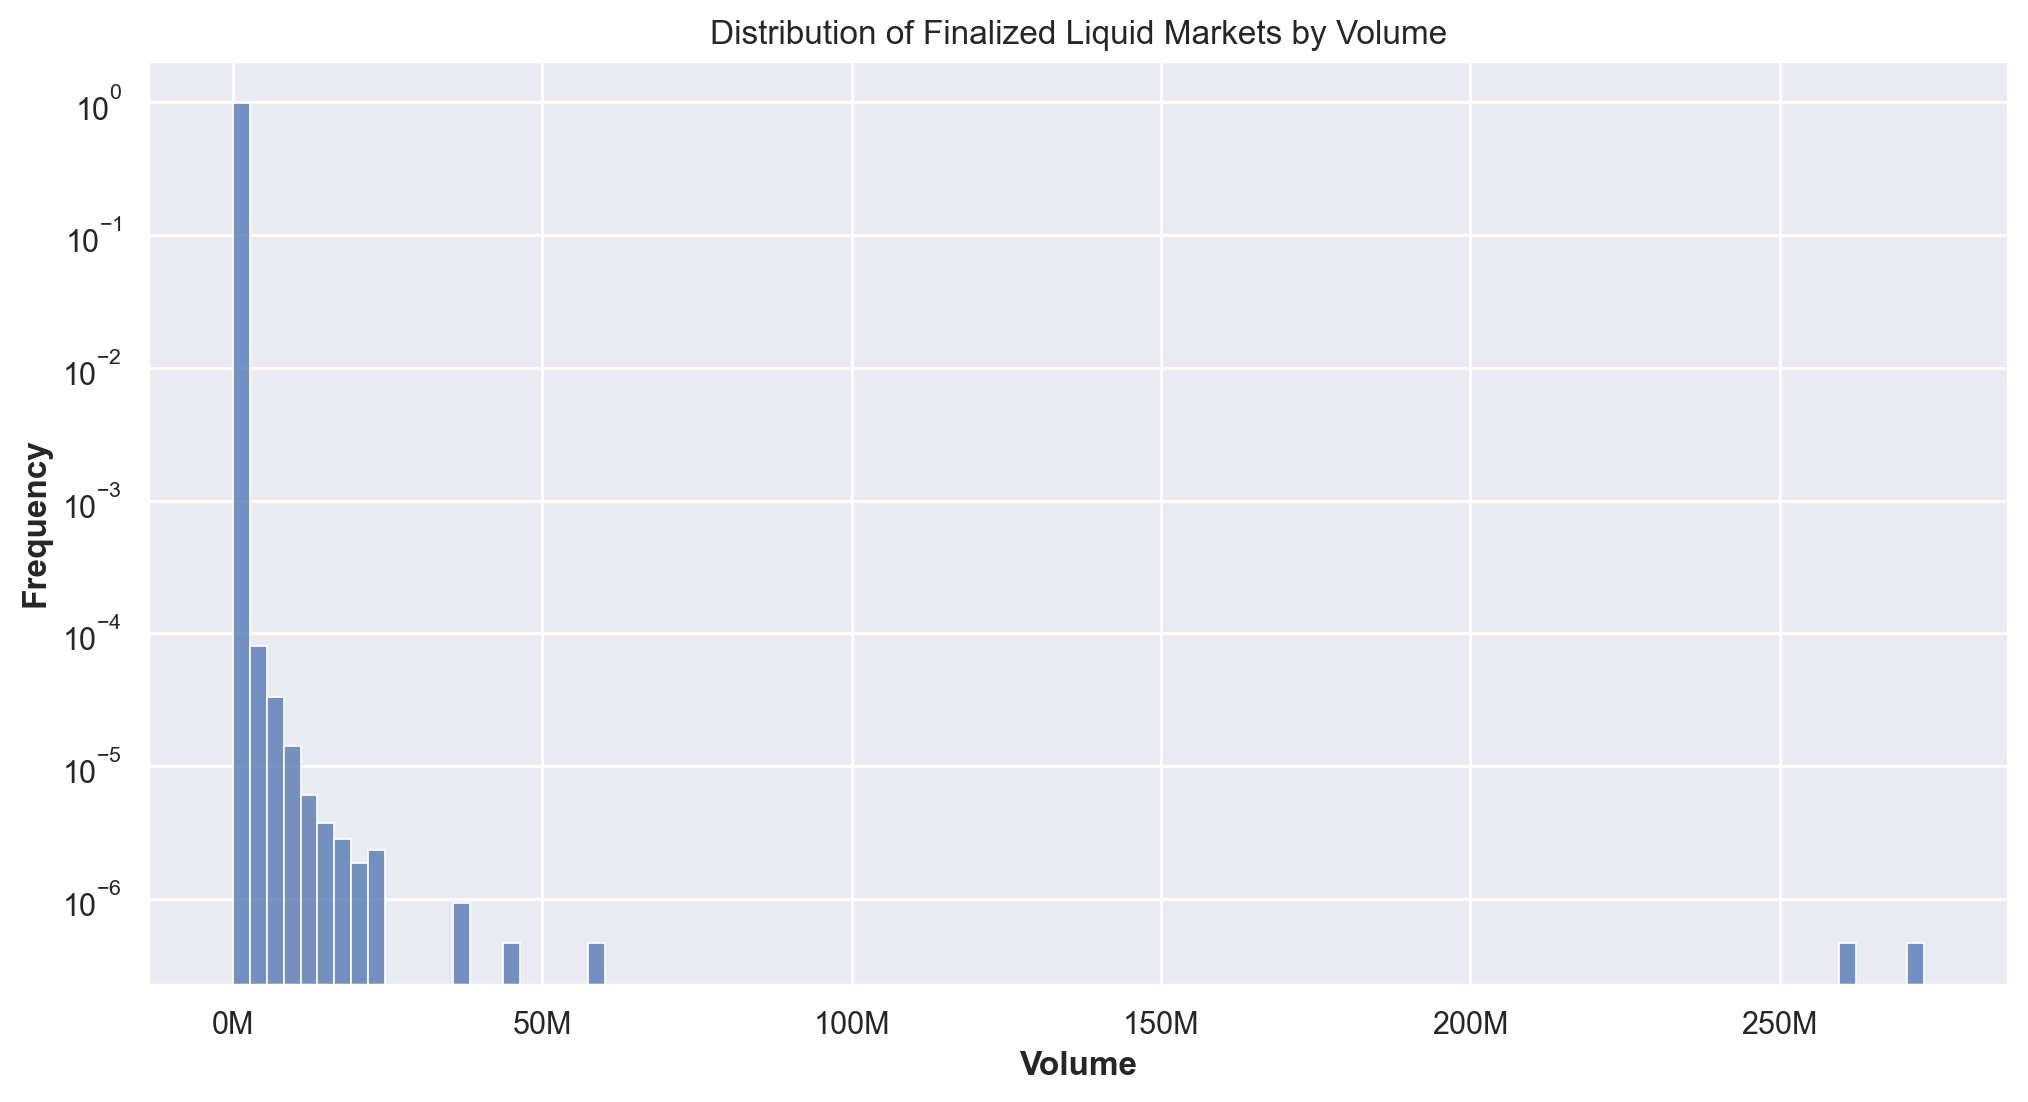

In [133]:
plt.figure(figsize=(12, 6))
sns.histplot(data=markets_df, x='volume', bins=100, kde=False, stat='proportion')
plt.title('Distribution of Finalized Liquid Markets by Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

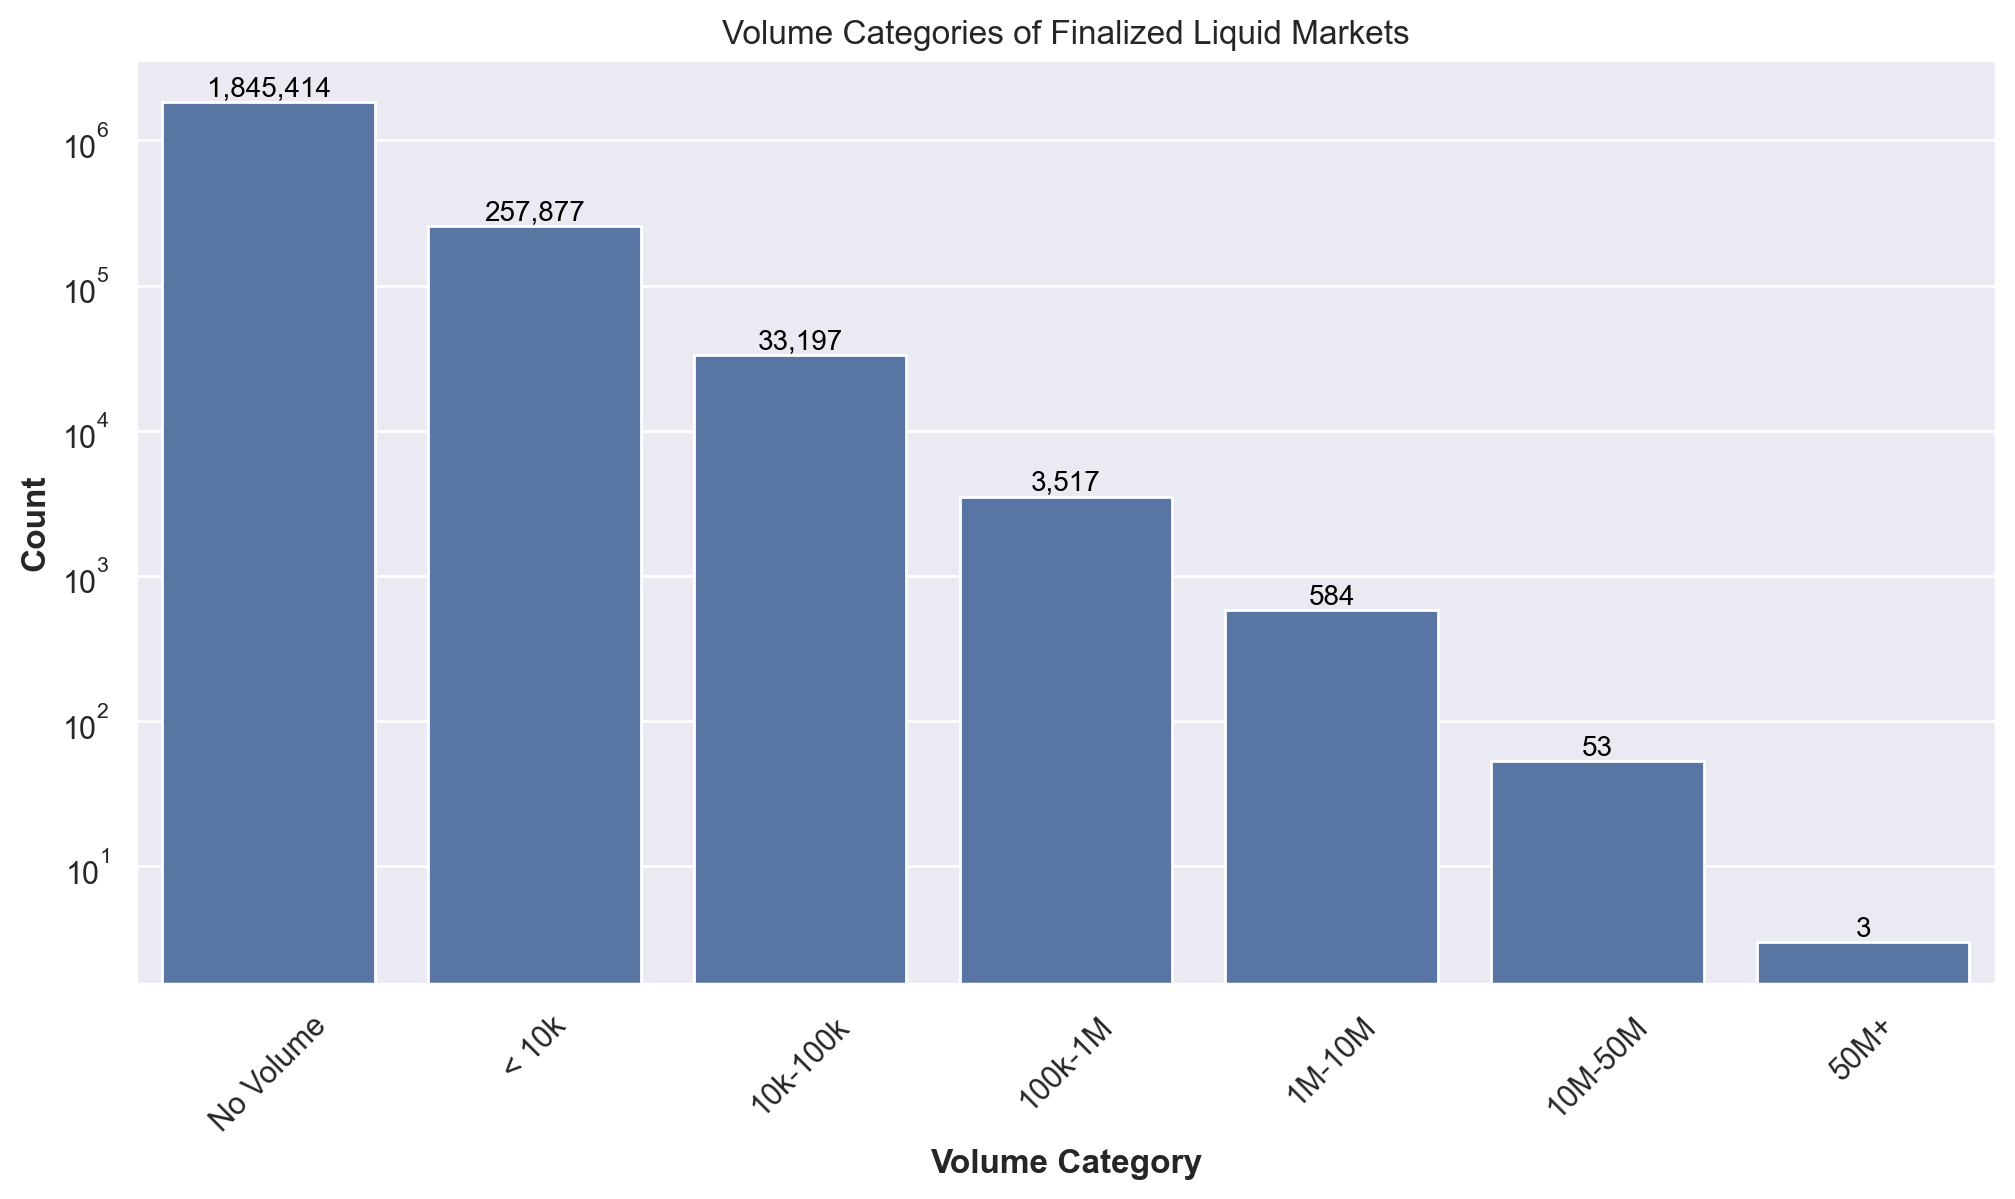

In [134]:
bins = [[0, 0.1], [0.1, 10000], [10000, 100000], [100000, 1000000], [1000000, 10000000], [10000000, 50000000], [50000000, 100000000000]]
bins_labels = ["No Volume", "< 10k", "10k-100k", "100k-1M", "1M-10M", "10M-50M", "50M+"]

def categorize_volume(volume):
    for i, (low, high) in enumerate(bins):
        if low <= volume < high:
            return f"{low}-{high}"
    return "Other"

markets_df['volume_category'] = markets_df['volume'].apply(categorize_volume)
plt.figure(figsize=(12, 6)) 
sns.countplot(data=markets_df, x='volume_category', order=sorted(markets_df['volume_category'].unique()))
# Override the x-tick labels to show ranges
plt.xticks(ticks=range(len(bins_labels)), labels=bins_labels, rotation=45)
# Add printed number on top of each bar (and formate them clearly with "," thousands separator)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', rotation=0)
plt.title('Volume Categories of Finalized Liquid Markets')
plt.xlabel('Volume Category')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [135]:
fin_liquid_markets = markets_df[(markets_df['status'] == "finalized") & (markets_df['volume'] > 500000)]
fin_liquid_markets = fin_liquid_markets.reset_index(drop=True)
# fin_liquid_markets.to_csv("FinalizedLiquidMarkets.csv", index=False)
fin_liquid_markets

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate,volume_category
0,KXATPMATCH-25JUL11SINDJO-DJO,KXATPMATCH-25JUL11SINDJO,binary,Will Novak Djokovic be a winner of the semifin...,NaN,Novak Djokovic,Novak Djokovic,2025-07-09T18:45:00Z,2025-07-11T18:00:53.109089Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
1,KXATPMATCH-25JUL11SINDJO-SIN,KXATPMATCH-25JUL11SINDJO,binary,Will Jannik Sinner be a winner of the semifina...,NaN,Jannik Sinner,Jannik Sinner,2025-07-09T18:45:00Z,2025-07-11T18:00:53.109089Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
2,KXWTAMATCH-25JUL10BENSWI-SWI,KXWTAMATCH-25JUL10BENSWI,binary,Will Iga Swiatek be a winner of the semifinal ...,NaN,Iga Swiatek,Iga Swiatek,2025-07-09T15:05:00Z,2025-07-10T17:15:19.053047Z,2025-07-10T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
3,KXWTAMATCH-25JUL10BENSWI-BEN,KXWTAMATCH-25JUL10BENSWI,binary,Will Belinda Bencic be a winner of the semifin...,NaN,Belinda Bencic,Belinda Bencic,2025-07-09T15:05:00Z,2025-07-10T17:15:19.053047Z,2025-07-10T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
4,KXATPMATCH-25JUL11FRIALC-FRI,KXATPMATCH-25JUL11FRIALC,binary,Will Taylor Fritz be a winner of the semifinal...,NaN,Taylor Fritz,Taylor Fritz,2025-07-08T18:05:00Z,2025-07-11T15:30:29.544767Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,FED-23MAY-T5.00,FED-23MAY,binary,Will the upper bound of the federal funds rate...,>5.00% :: 25+ bp hike,Above 5.00%,5.00% or below,2022-11-02T15:15:00Z,2023-05-03T17:55:00Z,2023-05-03T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
961,FED-23MAR-T5.00,FED-23MAR,binary,Will the upper bound of the federal funds rate...,>5.00% :: 50+ bp hike,Above 5.00%,5.00% or below,2022-10-17T14:00:00Z,2023-03-22T17:55:00Z,2023-03-22T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
962,FED-23MAR-T4.75,FED-23MAR,binary,Will the upper bound of the federal funds rate...,>4.75% :: 25+ bp hike,Above 4.75%,4.75% or below,2022-10-17T14:00:00Z,2023-03-22T17:55:00Z,2023-03-22T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
963,FED-22SEP-T3.00,FED-22SEP,binary,Will the federal funds rate be above 3.00% fol...,>3.00% :: 75bp hike or greater,Above 3.00%,3.00% or below,2022-06-14T15:15:00Z,2022-09-21T17:55:00Z,2022-09-27T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000


In [136]:
out = events.event_info("PRES-2024")
out["markets"]#, out["event_info"]

,market_ticker,yes_sub_title,range,strike_type,last_price,yes_bid,yes_ask,no_bid,no_ask,volume,open_time,close_time,status,rules_primary
0,PRES-2024-KH,Kamala Harris,:: or another Democrat,custom,1,0,1,99,100,273312857,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Kamala Harris or another representative of ...
1,PRES-2024-DJT,Donald Trump,:: or another Republican,None,99,99,100,0,1,262334207,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Donald Trump or another representative of t...
2,PRES-2024-RFK,Robert F. Kennedy Jr.,:: or another We the People nominee,custom,1,0,1,99,100,224361,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Robert F. Kennedy Jr. or another representa...
3,PRES-2024-JS,Jill Stein,:: or another Green Party nominee,custom,1,0,1,99,100,40394,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Jill Stein or another representative of the...
4,PRES-2024-CO,Chase Oliver,:: or another Libertarian,custom,1,0,1,99,100,20834,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Chase Oliver or another representative of t...
5,PRES-2024-CW,Cornel West,:: or another Justice for All nominee,custom,1,0,1,99,100,16290,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Cornel West or another representative of th...


In [137]:
results = {}

for mkt in out["markets"]["market_ticker"].values:
    cs_df = market.candlesticks_to_df(market.get_full_market(series_ticker="KXLLM1", ticker=mkt, period_interval='h', end_ts='11/10/2024'))[['end_period', 'yes_ask_close', 'yes_bid_close', 'volume']]
    
    cs_df['end_period'] = pd.to_datetime(cs_df['end_period'])
    cs_df['date'] = cs_df['end_period']
    cs_df['midval'] = (cs_df['yes_ask_close'] + cs_df['yes_bid_close']) / 2
    cs_df['ask'] = cs_df['yes_ask_close']
    cs_df['bid'] = cs_df['yes_bid_close']
    cs_df = cs_df.drop(columns=['yes_ask_close', 'yes_bid_close', 'end_period'])
    cs_df.set_index('date', inplace=True)
    title = out["markets"].loc[out["markets"]["market_ticker"] == mkt, "yes_sub_title"].values[0]
    # range = parse_range_string(range)

    results[title] = cs_df

# Step 1: Compute the global index (union of all datetime indices)
all_indices = sorted(set().union(*[df.index for df in results.values()]))
global_index = pd.DatetimeIndex(all_indices)

# Step 2: Build the full DataFrame with aligned index
results_df = pd.DataFrame(index=global_index)

# Step 3: Merge all time series, aligned on the global index
for title, df in results.items():
    df = df.groupby(df.index).mean()  # or .sum(), or use .duplicated() line

    renamed_df = df.rename(columns={
        'midval': f'{title}_midval',
        'ask': f'{title}_ask',
        'bid': f'{title}_bid',
        'volume': f'{title}_volume'
    })

    renamed_df = renamed_df.reindex(global_index)
    results_df = pd.concat([results_df, renamed_df], axis=1)

# results_df.ffill(inplace=True)
for col in results_df.columns:
    if '_midval' in col:
        vol_col = col.replace('_midval', '_volume')
        filled_series = results_df[col].copy()
        volume_series = results_df[vol_col]

        for i in range(1, len(filled_series)):
            if pd.isna(filled_series.iloc[i]) and pd.notna(volume_series.iloc[i-1]) and volume_series.iloc[i-1] > 200:
                filled_series.iloc[i] = filled_series.iloc[i - 1]

        results_df[col] = filled_series

# Step 4: Final computed columns
results_df['Vol'] = results_df[[col for col in results_df.columns if '_volume' in col]].sum(axis=1)
results_df['Tot'] = results_df[[col for col in results_df.columns if '_midval' in col]].sum(axis=1)

results_df.index.name = 'date'
results_df


,Kamala Harris_volume,Kamala Harris_midval,Kamala Harris_ask,Kamala Harris_bid,Donald Trump_volume,Donald Trump_midval,Donald Trump_ask,Donald Trump_bid,Robert F. Kennedy Jr._volume,Robert F. Kennedy Jr._midval,...,Chase Oliver_volume,Chase Oliver_midval,Chase Oliver_ask,Chase Oliver_bid,Cornel West_volume,Cornel West_midval,Cornel West_ask,Cornel West_bid,Vol,Tot
date,,,,,,,,,,,,,,,,,,,,,
2024-10-04 13:00:00,24083.0,50.5,51.0,50.0,39835.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.5,1.0,0.0,63919.0,100.5
2024-10-04 14:00:00,4330.0,50.5,51.0,50.0,3390.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7720.0,100.0
2024-10-04 15:00:00,6199.0,50.5,51.0,50.0,3382.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9581.0,100.0
2024-10-04 16:00:00,2814.0,50.5,51.0,50.0,3804.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6618.0,100.0
2024-10-04 17:00:00,8601.0,50.5,51.0,50.0,21784.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30385.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-09 20:00:00,21514.0,1.5,2.0,1.0,54705.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76219.0,99.0
2024-11-09 21:00:00,56499.0,1.5,2.0,1.0,77001.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133500.0,99.0
2024-11-09 22:00:00,94528.0,1.5,2.0,1.0,41228.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135756.0,99.0


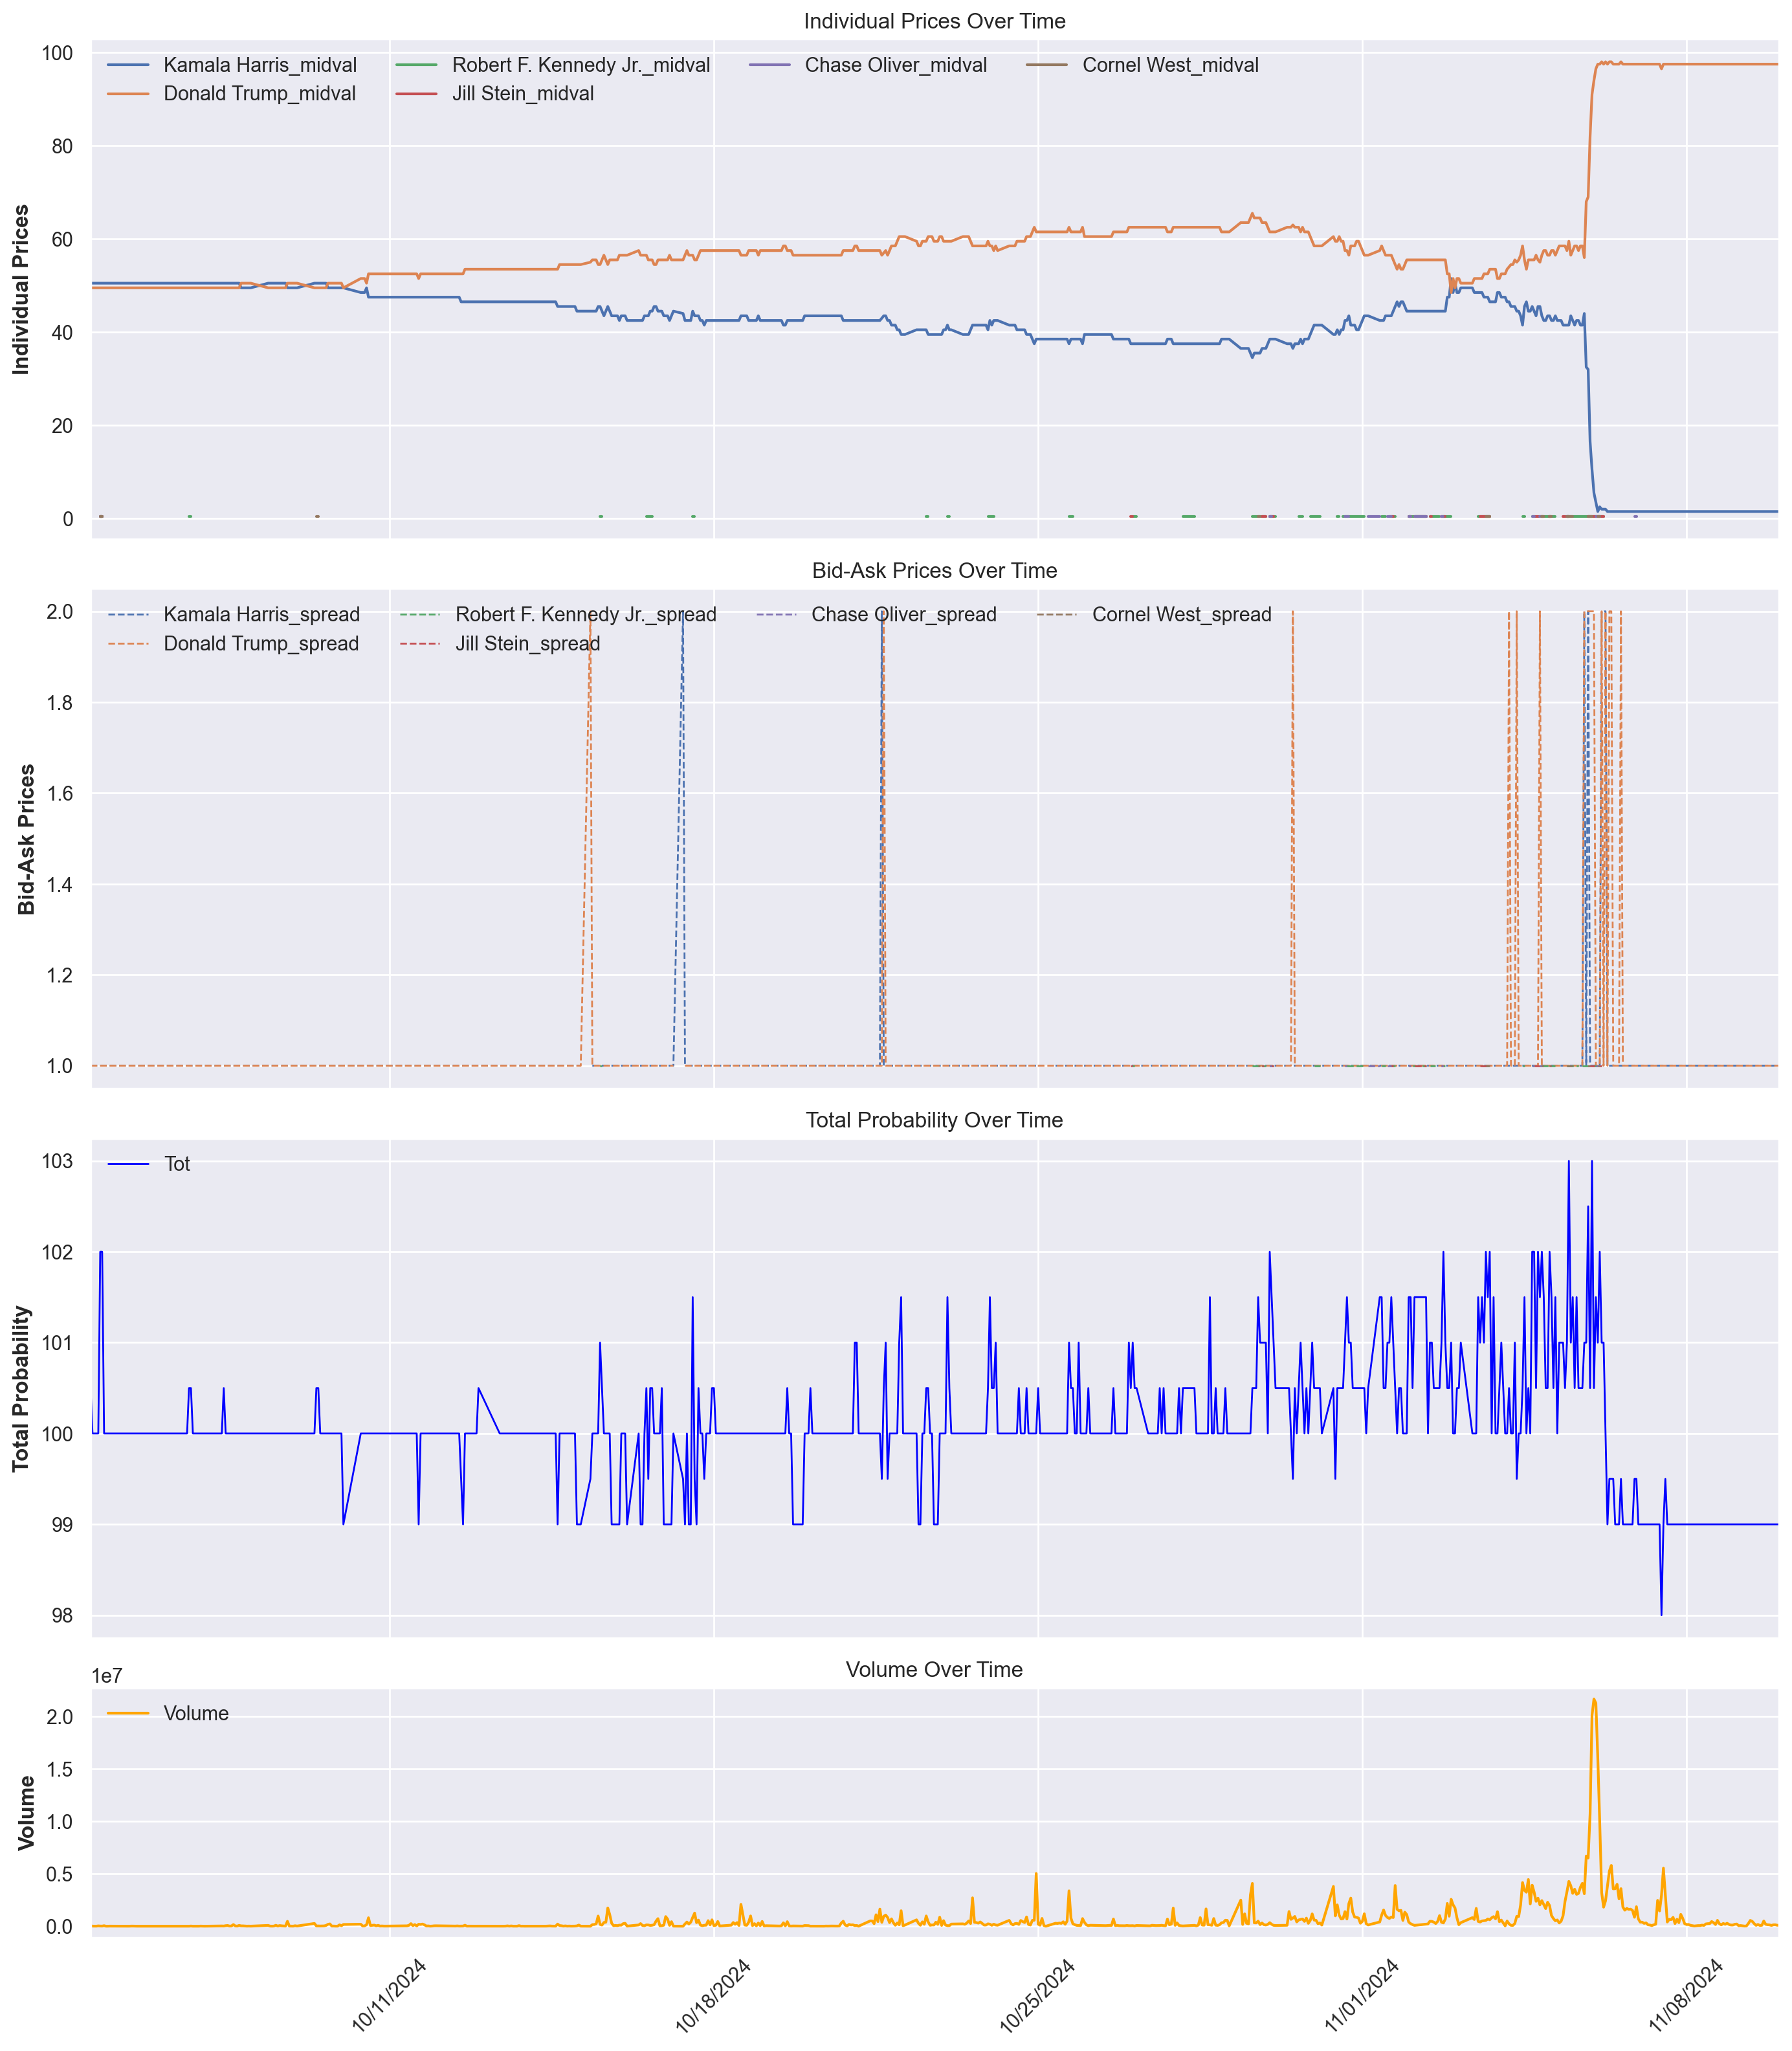

In [138]:
plot_df = results_df.reset_index()

# Identify price columns (all columns except 'date', 'Tot', and 'Vol')
price_columns = [col for col in plot_df.columns if "_midval" in col]

# Create a figure with 3 subplots, making the top two price plots the same size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(14, 16), 
                                    gridspec_kw={'height_ratios': [2, 2, 2, 1]}, 
                                    sharex=True)

# Plot 1: Individual Prices
for col in price_columns:
    ax1.plot(plot_df['date'], plot_df[col], linewidth=1.5, label=col)
ax1.set_ylabel('Individual Prices')
ax1.set_title('Individual Prices Over Time')
ax1.legend(loc='upper left', ncol=min(4, len(price_columns)))
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

# Plot 2: Bid-Ask Prices
for col in price_columns:
    ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_ask')] - plot_df[col.replace('_midval', '_bid')], linestyle='--', linewidth=1, label=col.replace('_midval', '_spread'))
    # ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_bid')], linestyle=':', linewidth=1, label=col.replace('_midval', '_bid'))
ax2.set_ylabel('Bid-Ask Prices')
ax2.set_title('Bid-Ask Prices Over Time')
ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
ax2.grid(True)
plt.setp(ax2.get_xticklabels(), visible=False)

# selected_outcome = 'Donald Trump'

# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_ask'], linestyle='--', linewidth=1, label=selected_outcome + '_ask')
# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_bid'], linestyle=':', linewidth=1, label=selected_outcome + '_bid')
# ax2.set_ylabel('Bid-Ask Prices')
# ax2.set_title('Bid-Ask Prices Over Time')
# ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
# ax2.grid(True)
# plt.setp(ax2.get_xticklabels(), visible=False)

# Plot 3: Total Probability
ax3.plot(plot_df['date'], plot_df['Tot'], color='blue', linewidth=1, label='Tot')
ax3.set_ylabel('Total Probability')
ax3.set_title('Total Probability Over Time')
ax3.legend(loc='upper left')
ax3.grid(True)
plt.setp(ax3.get_xticklabels(), visible=False)

# Calculate appropriate width for bars
if plot_df.shape[0] > 1:
    time_diff = (plot_df['date'].iloc[1] - plot_df['date'].iloc[0]).total_seconds()
    width_in_days = (time_diff / (24 * 60 * 60)) * 0.8
else:
    width_in_days = 0.01

# Plot 4: Volume
ax4.plot(plot_df['date'], plot_df['Vol'], color='orange', label='Volume')
ax4.set_ylabel('Volume')
ax4.set_title('Volume Over Time')
ax4.legend(loc='upper left')
ax4.grid(True)

# Format only the bottom x-axis with more compact labels
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# Adjust the x-axis limits to match your data range
date_min = plot_df['date'].min()
date_max = plot_df['date'].max()
ax4.set_xlim(date_min, date_max)

plt.tight_layout()
plt.show()

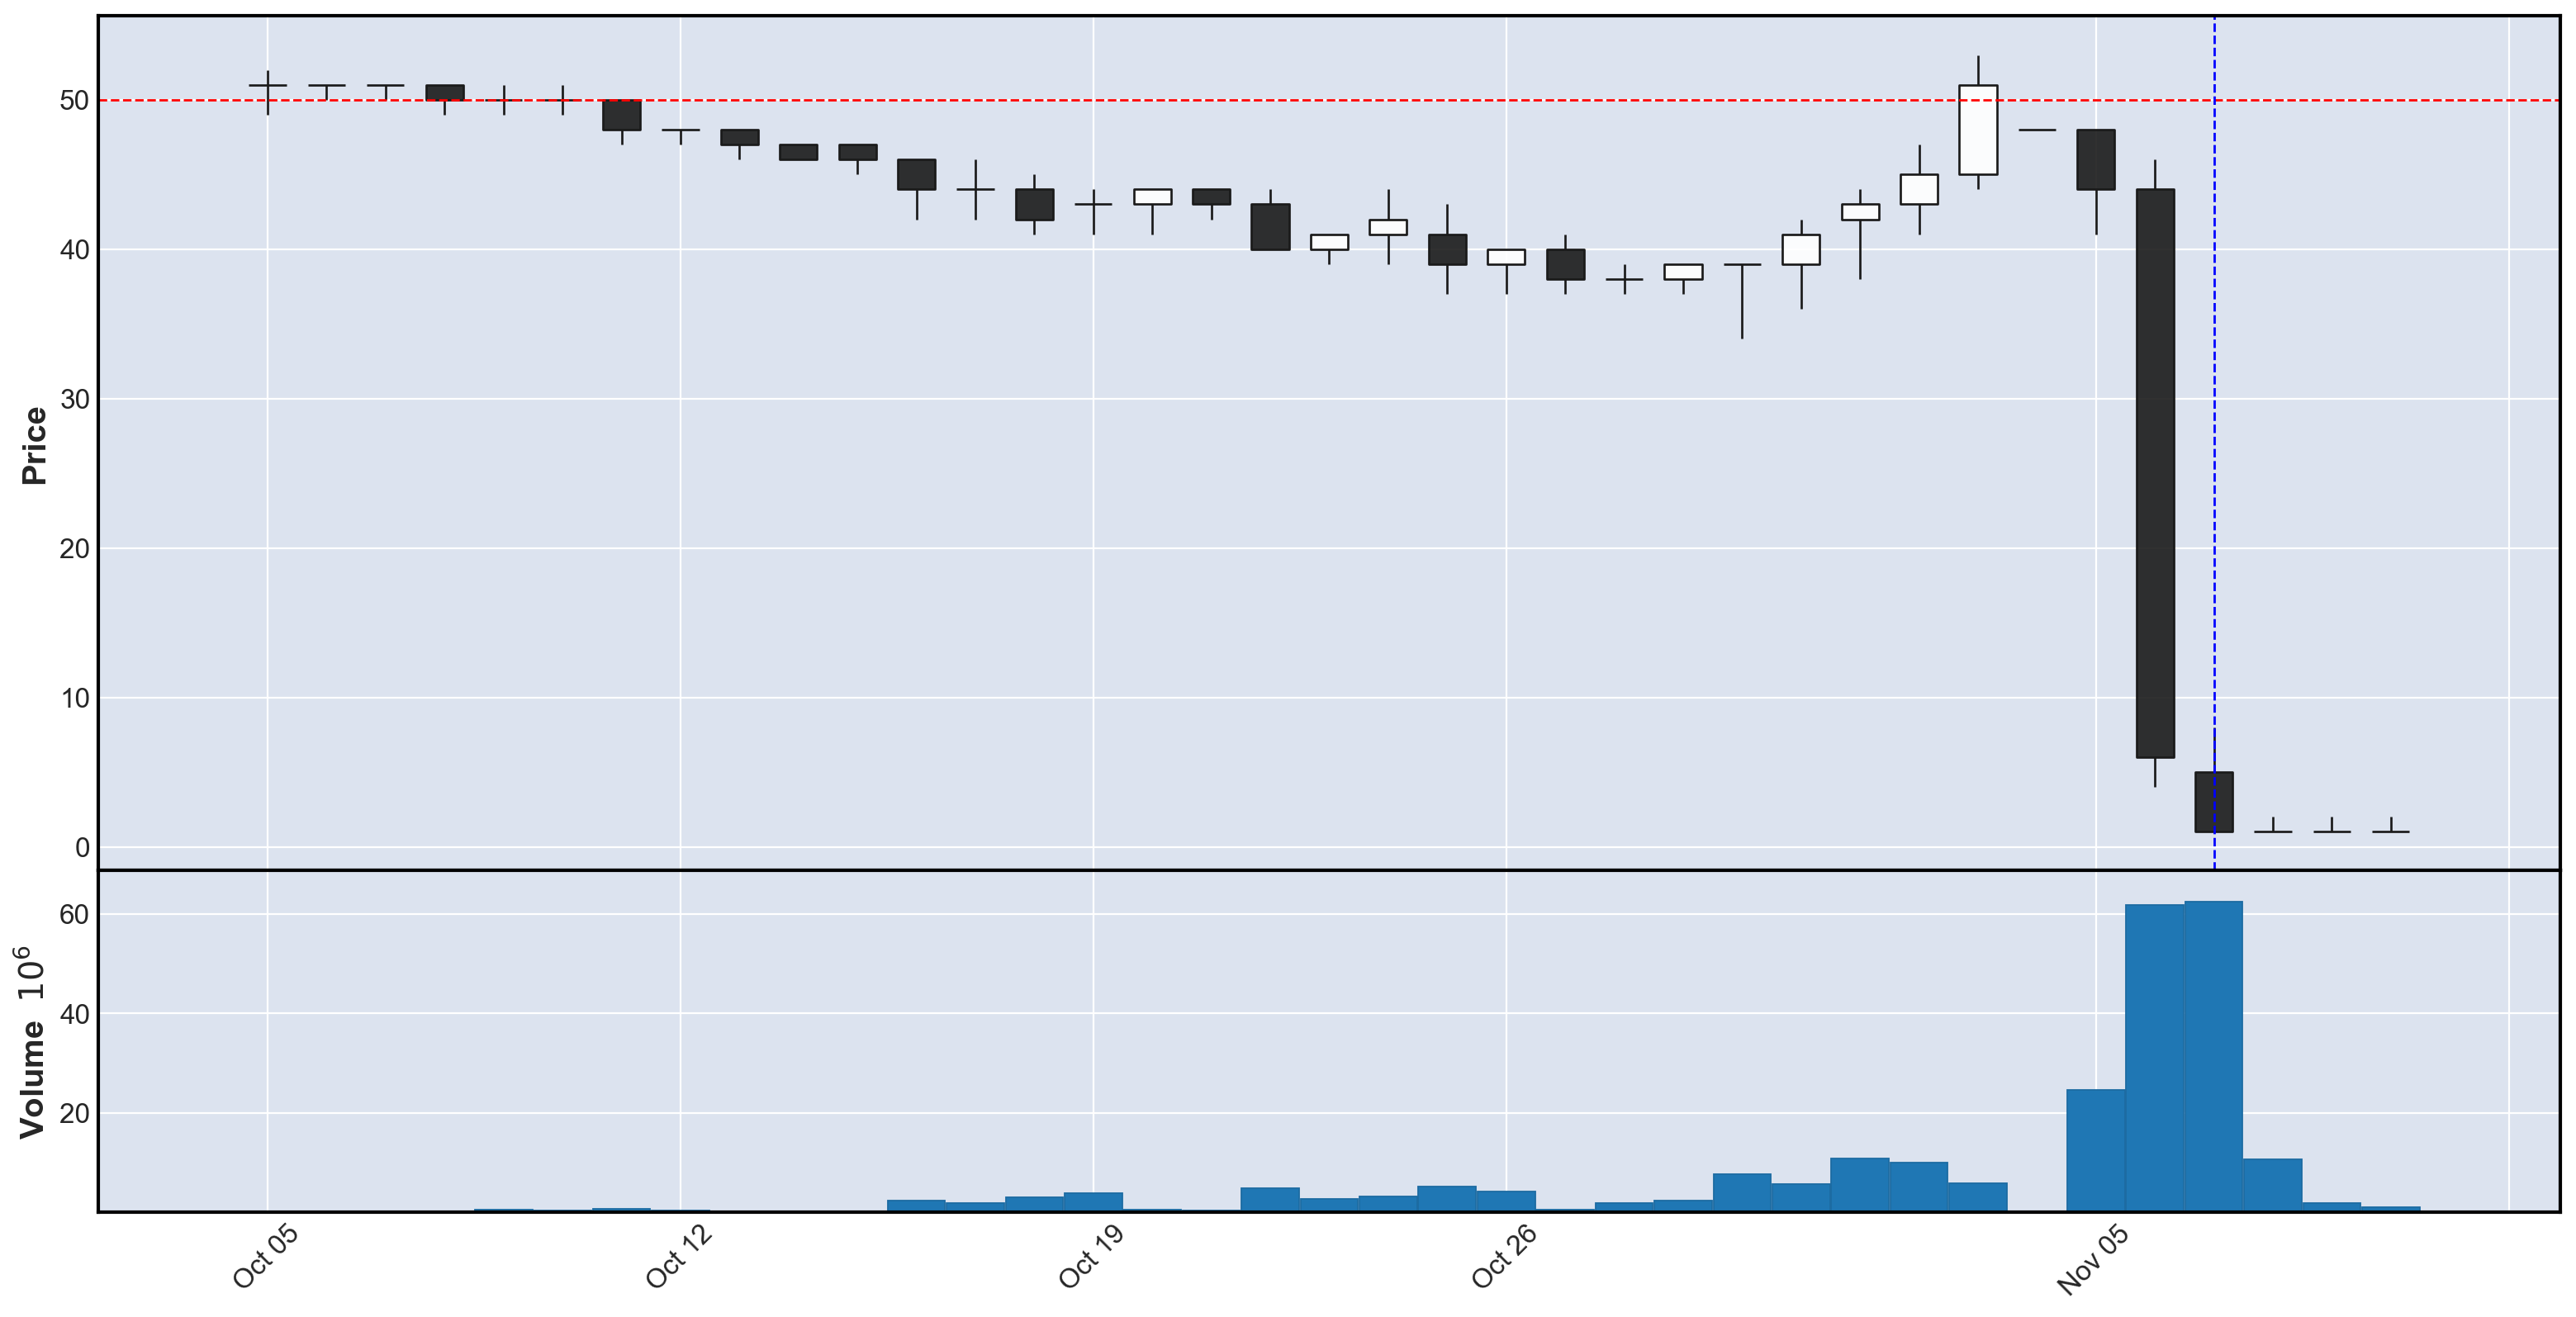

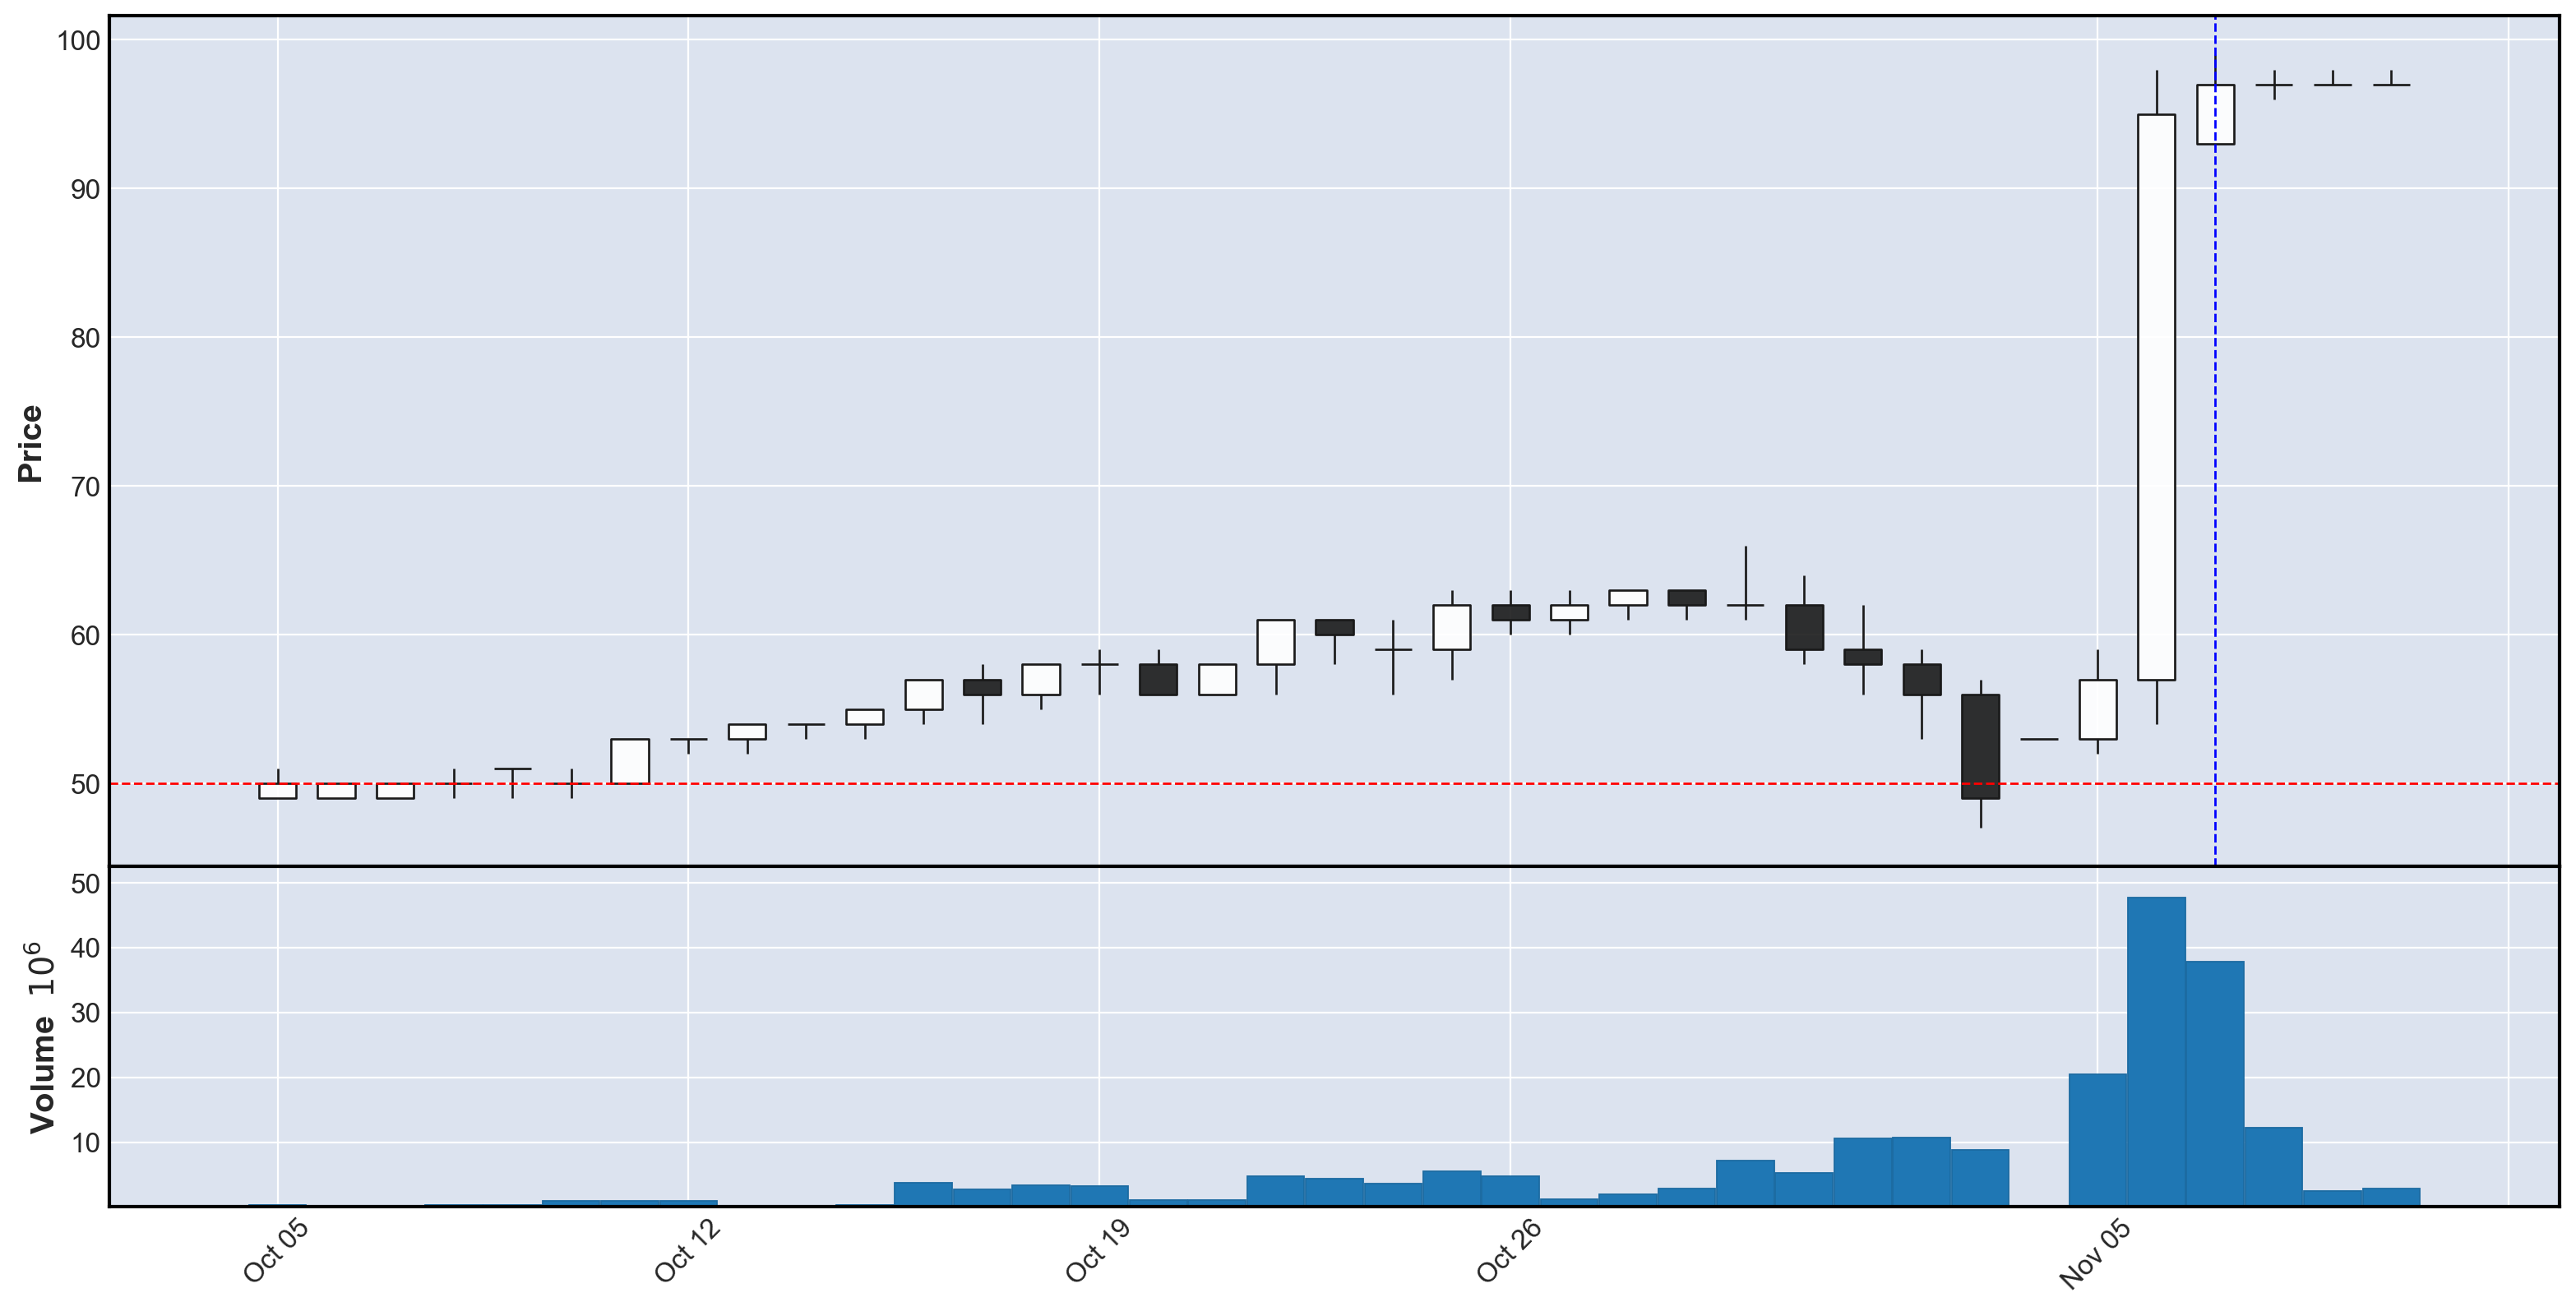

In [139]:
pres_djt_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-DJT",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)

pres_kh_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-KH",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)
djt_df = market.candlesticks_to_df(pres_djt_data)
kh_df = market.candlesticks_to_df(pres_kh_data)

djt_candlestick_df = market.build_candlestick(pres_djt_data)
kh_candlestick_df = market.build_candlestick(pres_kh_data)

fig, axes = mpf.plot(
    kh_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Set y-axis limits for the price chart (first axes object)
# axes[0].set_ylim(0, 60)  # customize as needed

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here


fig, axes = mpf.plot(
    djt_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here

In [ ]:
open_mkts = pd.json_normalize(market.get_all_markets(status="open", batch_size=100))
open_mkts

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
0,KXMLSGAME-25JUL16SJDAL-TIE,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KXMLSGAME-25JUL16SJDAL-SJ,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,,San Jose,San Jose,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KXMLSGAME-25JUL16SJDAL-DAL,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,,Dallas,Dallas,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KXMLSGAME-25JUL16SDTOR-TOR,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,,Toronto,Toronto,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KXMLSGAME-25JUL16SDTOR-TIE,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,MSFTCEO-25-SG,MSFTCEO-25,binary,Will Scott Guthrie be the next Microsoft CEO?,Scott Guthrie,Scott Guthrie,Not Scott Guthrie,2023-11-29T01:16:00Z,2026-01-01T04:59:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10616,MSFTCEO-25-SA,MSFTCEO-25,binary,Will Sam Altman be the next Microsoft CEO?,Sam Altman,Sam Altman,Not Sam Altman,2023-11-29T01:16:00Z,2026-01-01T04:59:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10617,MSFTCEO-25-BS,MSFTCEO-25,binary,Will Brad Smith be the next Microsoft CEO?,Brad Smith,Brad Smith,Not Brad Smith,2023-11-29T01:16:00Z,2026-01-01T04:59:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10618,APPLEPORT-25DEC31,APPLEPORT-25DEC31,binary,Will Apple announce a portless phone by Dec 31...,By Dec 31 2025,Reveals,Doesn't reveal,2023-10-25T14:00:00Z,2026-01-01T04:59:00Z,2025-12-31T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
orderbook = market.get_market_orderbook(ticker="KXFEDDECISION-25JUL-C25")["orderbook"]
yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

print("\nBids:")
for price, qty in yes_bids:
    print(f"  YES @ {price}¢ × {qty} contracts")

print("Asks:")
for price, qty in yes_asks:
    print(f"  YES @ {price}¢ × {qty} contracts")


Bids:
  YES @ 1¢ × 1010500 contracts
  YES @ 2¢ × 708096 contracts
  YES @ 3¢ × 501893 contracts
  YES @ 4¢ × 568281 contracts
Asks:
  YES @ 6¢ × 856235 contracts
  YES @ 7¢ × 703842 contracts
  YES @ 8¢ × 7500 contracts
  YES @ 9¢ × 5459 contracts
  YES @ 10¢ × 161 contracts
  YES @ 11¢ × 1000 contracts
  YES @ 12¢ × 18374 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 7599 contracts
  YES @ 17¢ × 1069 contracts
  YES @ 18¢ × 1261 contracts
  YES @ 19¢ × 1625 contracts
  YES @ 20¢ × 1902 contracts
  YES @ 21¢ × 2095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 29¢ × 50 contracts
  YES @ 35¢ × 1 contracts
  YES @ 44¢ × 500 contracts
  YES @ 48¢ × 104 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22550 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YES @ 96¢ × 4000 contracts
  YES @ 97¢ × 30700 contracts
  YES @ 9

In [142]:
ask_prices = [p for p, _ in yes_asks]
ask_sizes = [q for _, q in yes_asks]
ask_cum = list(np.cumsum(ask_sizes))

bid_prices = [p for p, _ in yes_bids]
bid_sizes = [q for _, q in yes_bids]
bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

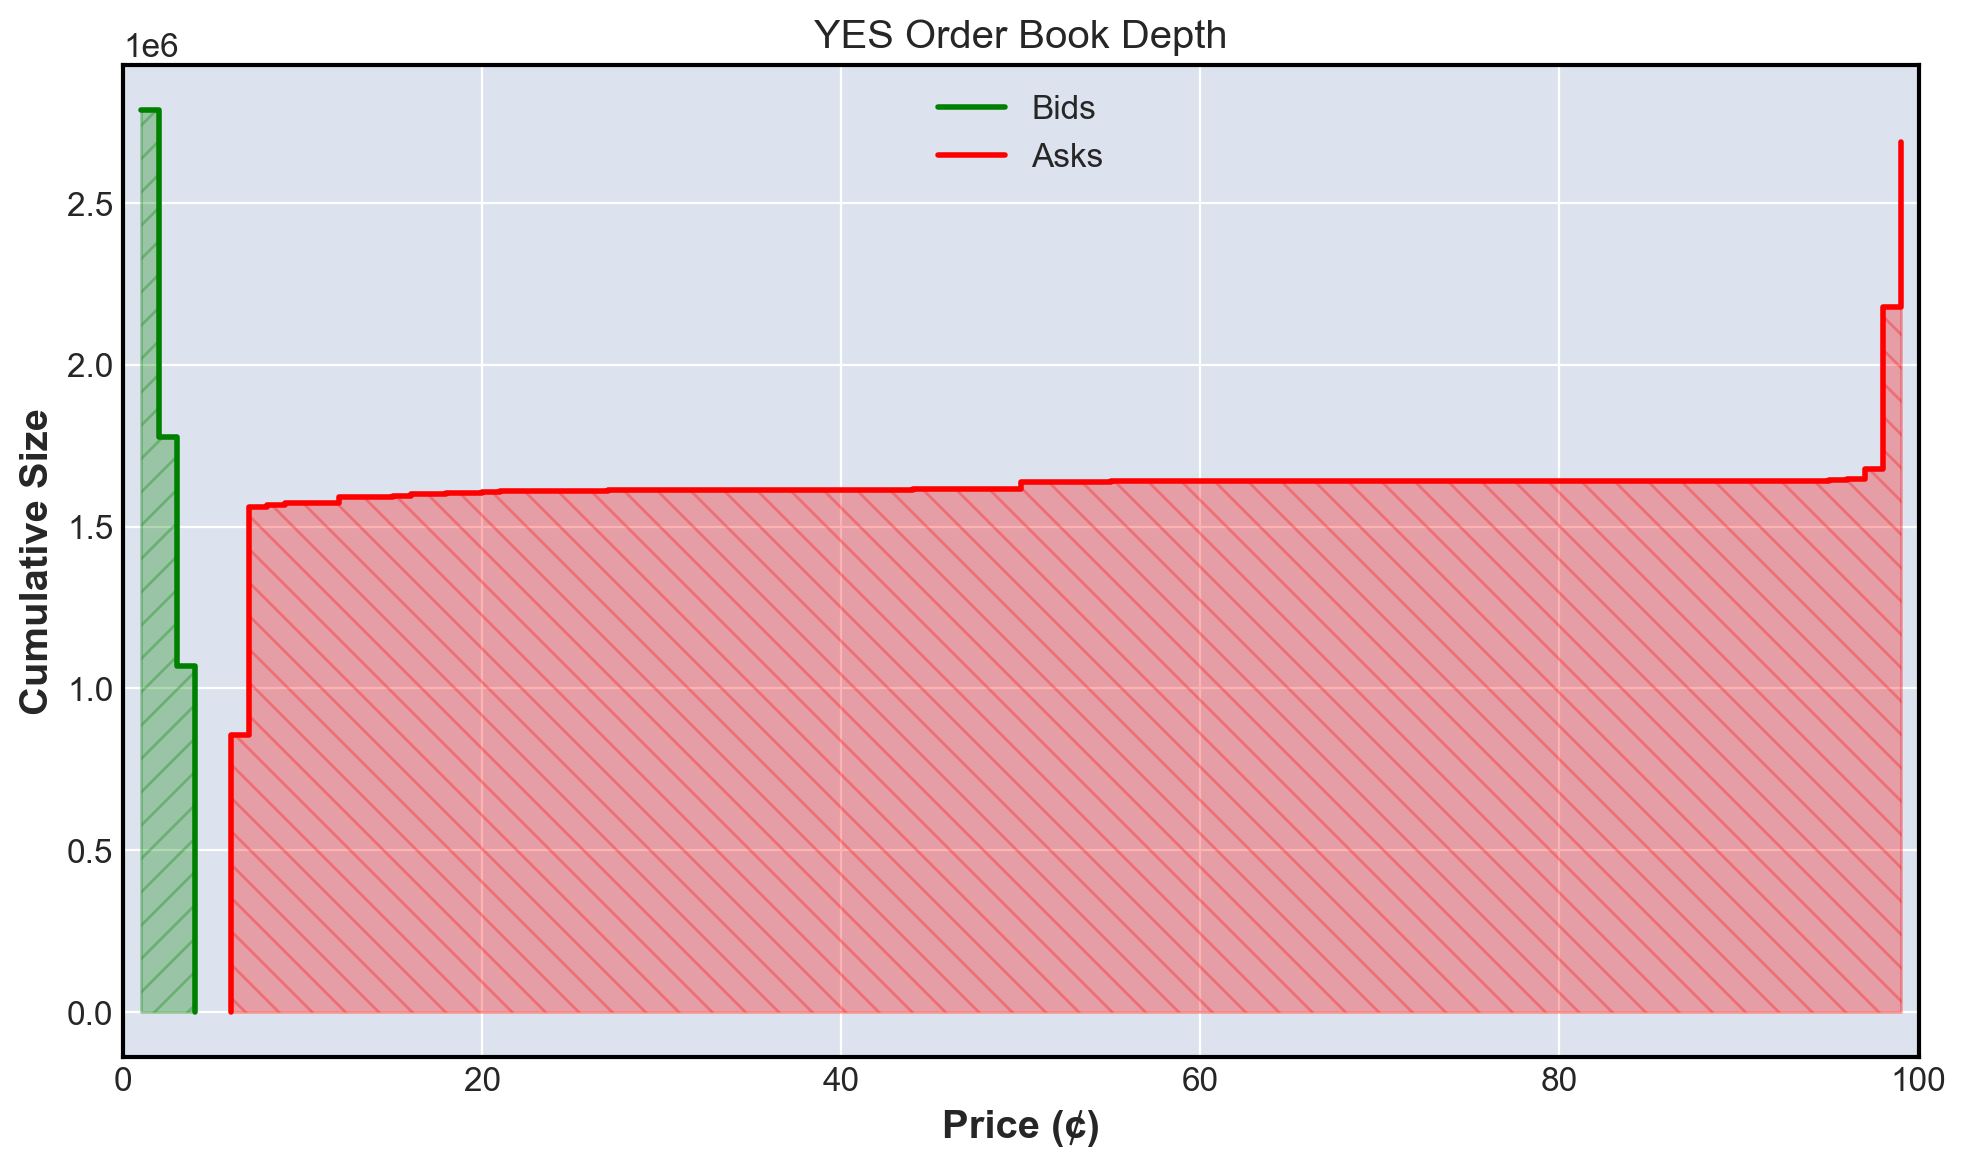

In [143]:
# Duplicate the last point at the end of each side — at same price, with volume = 0
bid_prices_ext = bid_prices + [bid_prices[-1]]
bid_cum_ext = bid_cum + [0]

ask_prices_ext = [ask_prices[0]] + ask_prices
ask_cum_ext = [0] + ask_cum

# Plot
plt.figure(figsize=(10, 6))
plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

plt.xlabel("Price (¢)")
plt.ylabel("Cumulative Size")
plt.title("YES Order Book Depth")
plt.legend(loc="upper center")
plt.xlim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


In [145]:
def get_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    print("\nBids:")
    for price, qty in yes_bids:
        print(f"  YES @ {price}¢ × {qty} contracts")

    print("Asks:")
    for price, qty in yes_asks:
        print(f"  YES @ {price}¢ × {qty} contracts")

def plot_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    ask_prices = [p for p, _ in yes_asks]
    ask_sizes = [q for _, q in yes_asks]
    ask_cum = list(np.cumsum(ask_sizes))

    bid_prices = [p for p, _ in yes_bids]
    bid_sizes = [q for _, q in yes_bids]
    bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

    bid_prices_ext = bid_prices + [bid_prices[-1]]
    bid_cum_ext = bid_cum + [0]

    ask_prices_ext = [ask_prices[0]] + ask_prices
    ask_cum_ext = [0] + ask_cum

    plt.figure(figsize=(10, 6))
    plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
    plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

    plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
    plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

    plt.xlabel("Price (¢)")
    plt.ylabel("Cumulative Size")
    plt.title("YES Order Book Depth")
    plt.legend(loc="upper center")
    plt.xlim(0, 100)
    plt.grid(True)

    import matplotlib.ticker as mticker
    max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
    if max_val >= 1_000_000:
        divisor = 1_000_000
        suffix = "M"
    elif max_val >= 1_000:
        divisor = 1_000
        suffix = "K"
    else:
        divisor = 1
        suffix = ""

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

    plt.tight_layout()
    plt.show()

In [146]:
get_market_lob("KXFEDDECISION-25JUL-C25")


Bids:
  YES @ 1¢ × 1010500 contracts
  YES @ 2¢ × 708096 contracts
  YES @ 3¢ × 501893 contracts
  YES @ 4¢ × 568281 contracts
Asks:
  YES @ 6¢ × 856235 contracts
  YES @ 7¢ × 703842 contracts
  YES @ 8¢ × 7500 contracts
  YES @ 9¢ × 5459 contracts
  YES @ 10¢ × 161 contracts
  YES @ 11¢ × 1000 contracts
  YES @ 12¢ × 18374 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 7599 contracts
  YES @ 17¢ × 1069 contracts
  YES @ 18¢ × 1261 contracts
  YES @ 19¢ × 1625 contracts
  YES @ 20¢ × 1902 contracts
  YES @ 21¢ × 2095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 29¢ × 50 contracts
  YES @ 35¢ × 1 contracts
  YES @ 44¢ × 500 contracts
  YES @ 48¢ × 104 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22550 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YES @ 96¢ × 4000 contracts
  YES @ 97¢ × 30700 contracts
  YES @ 9

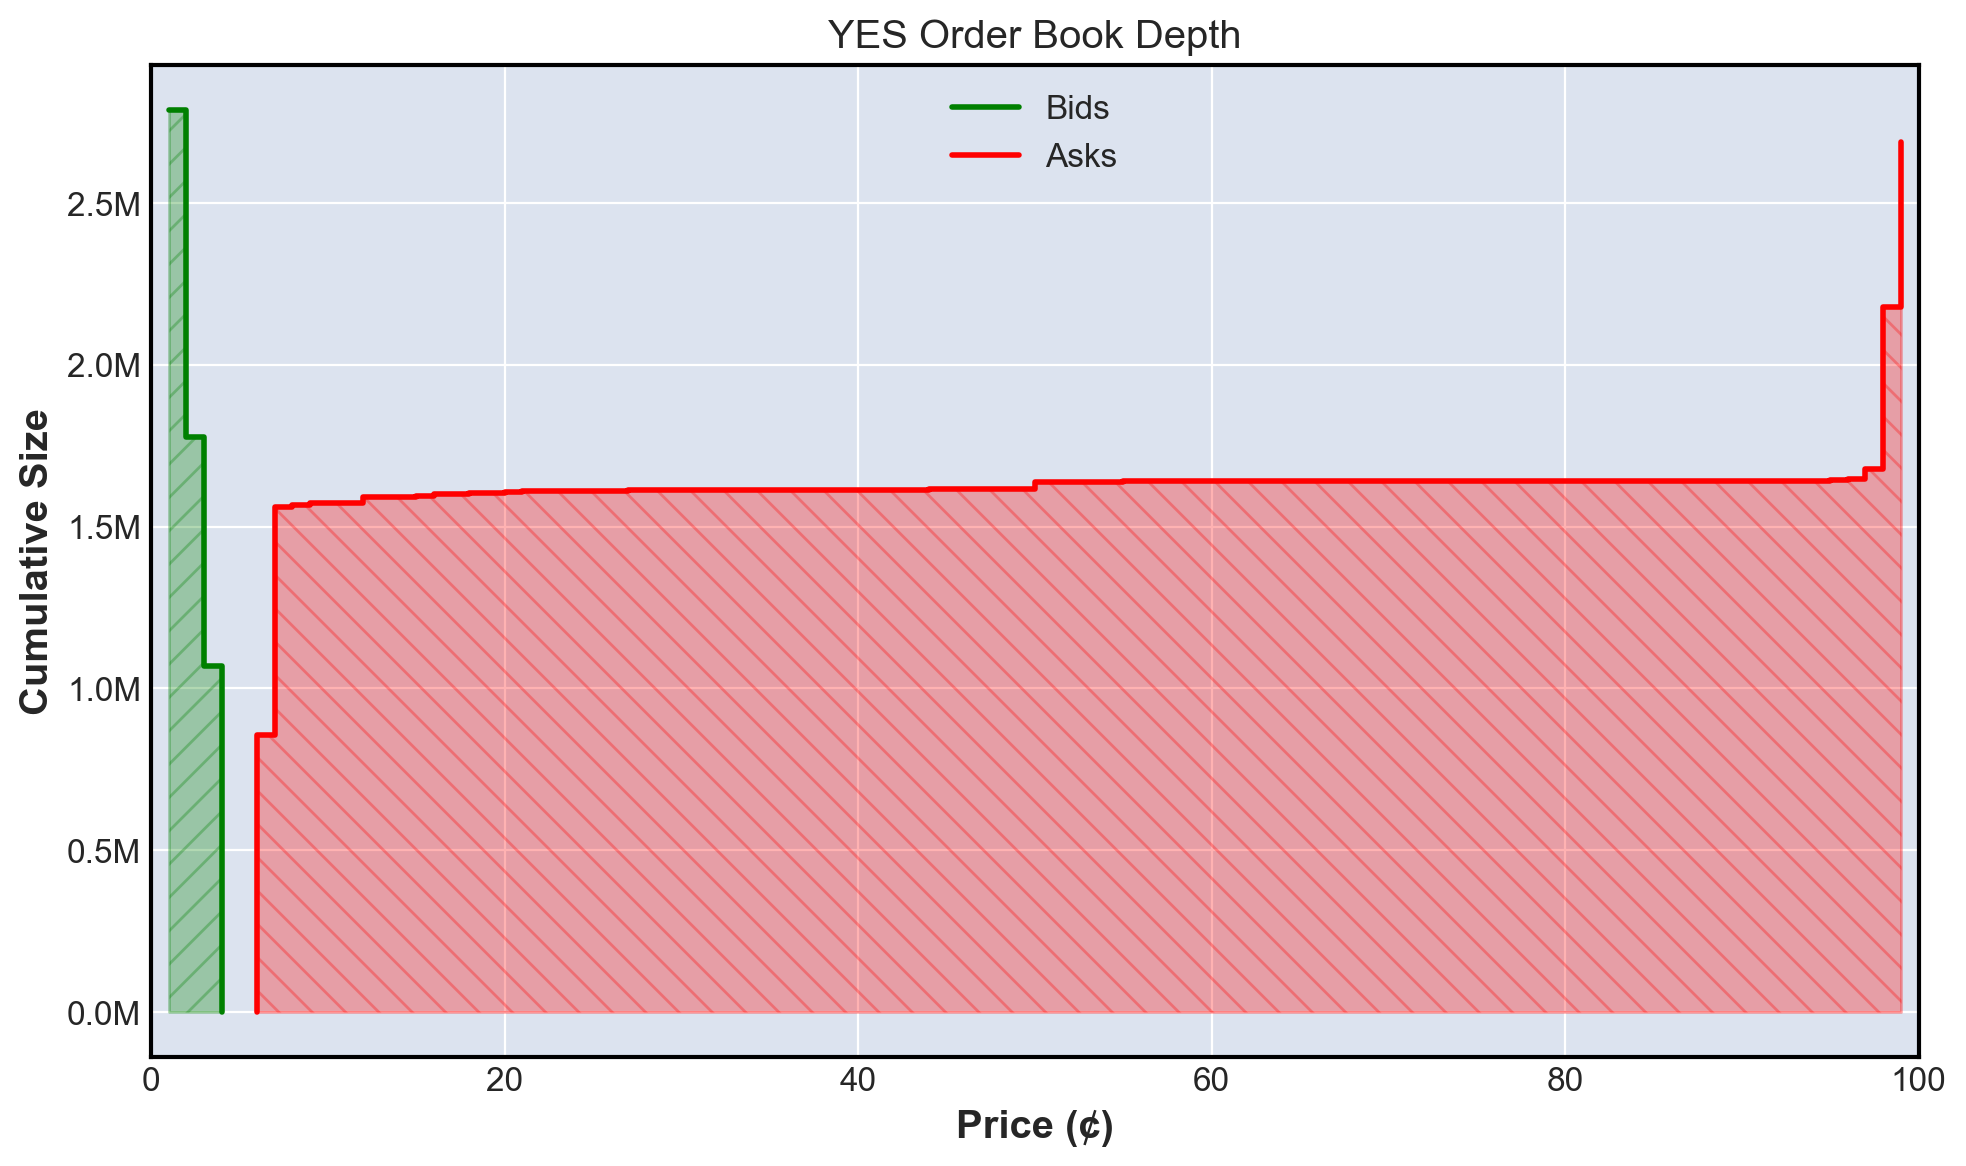

In [147]:
plot_market_lob("KXFEDDECISION-25JUL-C25")

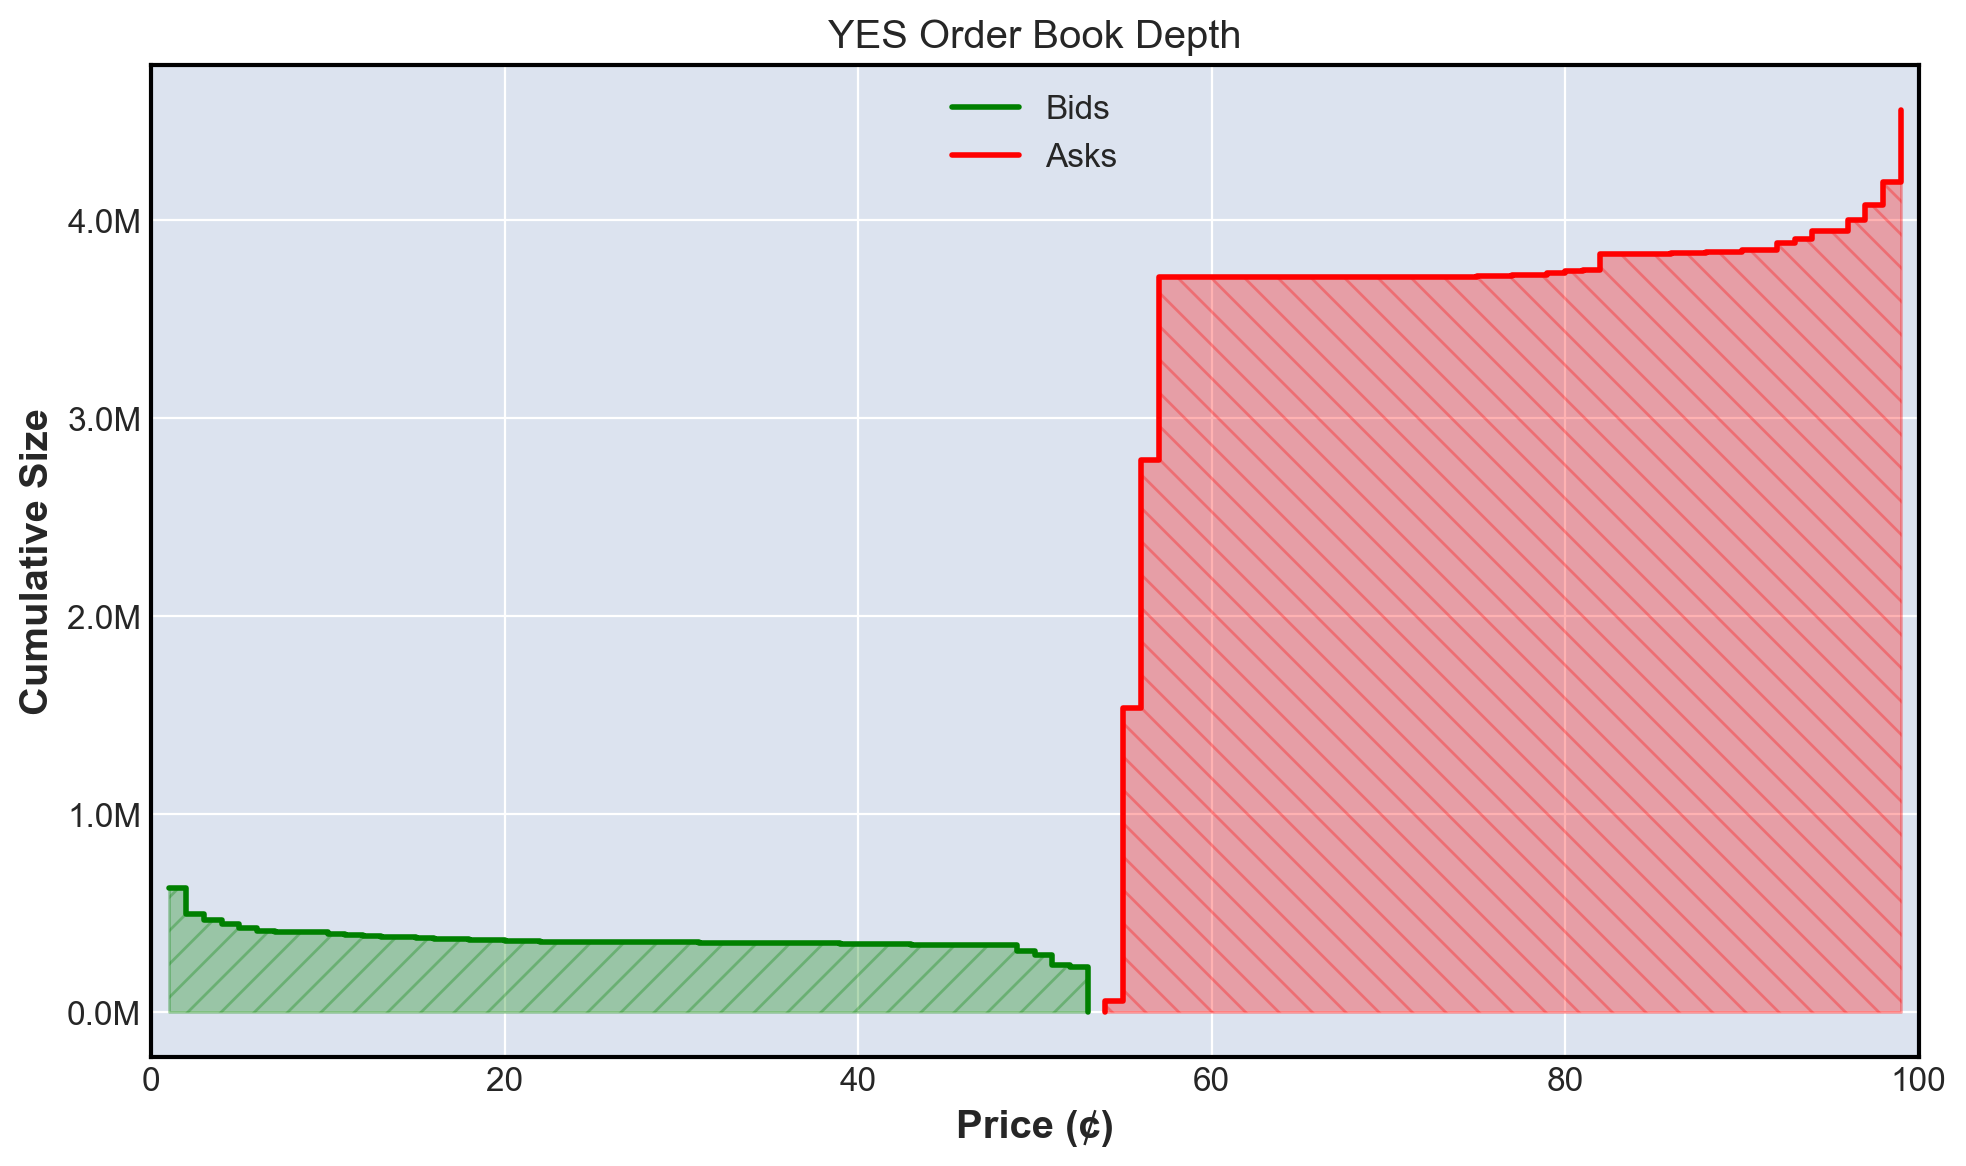

In [148]:
plot_market_lob("KXWMENSINGLES-25-CA")

In [152]:
import time
import os

def live_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            loop_start = time.time()
            os.system('cls' if os.name == 'nt' else 'clear')

            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))

    except KeyboardInterrupt:
        print("\nStopped.")


In [153]:
import time
from IPython.display import clear_output

def live_market_lob_notebook(ticker, refresh_interval=1):
    try:
        while True:
            loop_start = time.time()
            clear_output(wait=True)

            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))

    except KeyboardInterrupt:
        print("\nStopped.")


In [154]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

def live_plot_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            # Get and format orderbook
            loop_start = time.time()
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            ask_prices = [p for p, _ in yes_asks]
            ask_sizes = [q for _, q in yes_asks]
            ask_cum = list(np.cumsum(ask_sizes))

            bid_prices = [p for p, _ in yes_bids]
            bid_sizes = [q for _, q in yes_bids]
            bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

            # Extend gracefully to 0 at same price
            bid_prices_ext = bid_prices + [bid_prices[-1]]
            bid_cum_ext = bid_cum + [0]
            ask_prices_ext = [ask_prices[0]] + ask_prices
            ask_cum_ext = [0] + ask_cum

            # Clear and plot
            clear_output(wait=True)
            plt.figure(figsize=(10, 6))
            plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
            plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

            plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
            plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

            # Format y-axis with K/M
            import matplotlib.ticker as mticker
            max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
            if max_val >= 1_000_000:
                divisor = 1_000_000
                suffix = "M"
            elif max_val >= 1_000:
                divisor = 1_000
                suffix = "K"
            else:
                divisor = 1
                suffix = ""
            plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

            plt.xlabel("Price (¢)")
            plt.ylabel("Cumulative Size")
            plt.title(f"YES Order Book Depth — {ticker} ({time.strftime('%H:%M:%S')})")
            plt.legend(loc="upper center")
            plt.xlim(0, 100)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))


    except KeyboardInterrupt:
        clear_output(wait=True)
        print("Live plot stopped.")


In [157]:
exchange.get_exchange_schedule()

{'schedule': {'standard_hours': [{'start_time': '2024-12-01T00:00:00Z',
    'end_time': '2200-12-01T00:00:00Z',
    'monday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'tuesday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'wednesday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'thursday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'friday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'saturday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'sunday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}]}],
  'maintenance_windows': []}}

In [155]:
live_market_lob_notebook("KXFEDDECISION-25JUL-C25")

Live YES Order Book for KXFEDDECISION-25JUL-C25 — refreshed at 22:36:03

Bids:
  YES @ 1¢ × 1,010,500 contracts
  YES @ 2¢ × 708,096 contracts
  YES @ 3¢ × 500,534 contracts
  YES @ 4¢ × 568,432 contracts

Asks:
  YES @ 6¢ × 846,223 contracts
  YES @ 7¢ × 701,050 contracts
  YES @ 8¢ × 8,910 contracts
  YES @ 9¢ × 5,459 contracts
  YES @ 10¢ × 161 contracts
  YES @ 11¢ × 1,000 contracts
  YES @ 12¢ × 18,444 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 350 contracts
  YES @ 16¢ × 5,544 contracts
  YES @ 17¢ × 2,972 contracts
  YES @ 18¢ × 1,146 contracts
  YES @ 19¢ × 1,477 contracts
  YES @ 20¢ × 1,729 contracts
  YES @ 21¢ × 1,904 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5,000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 29¢ × 50 contracts
  YES @ 35¢ × 1 contracts
  YES @ 44¢ × 500 contracts
  YES @ 48¢ × 107 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22,550 contracts
  YES @ 55¢ × 1,500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2,000 contracts
  

In [158]:
live_plot_market_lob("KXFEDDECISION-25JUL-C25")

Live plot stopped.


In [189]:
markets_df

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate,volume_category
0,KXMLSGAME-25JUL16SJDAL-TIE,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
1,KXMLSGAME-25JUL16SJDAL-SJ,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,San Jose,San Jose,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
2,KXMLSGAME-25JUL16SJDAL-DAL,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,Dallas,Dallas,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
3,KXMLSGAME-25JUL16SDTOR-TOR,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,NaN,Toronto,Toronto,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
4,KXMLSGAME-25JUL16SDTOR-TIE,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,NaN,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140640,TEMP-21-T2.124,TEMP-21,binary,Will 2021 be the **hottest year on record**?,NaN,Above 2.124° C,2.124° C or below,2021-07-02T14:00:00Z,2022-01-10T00:00:00Z,2021-07-02T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
2140641,HOME-21JUN-T750,HOME-21JUN,binary,"Will new U.S. home sales be above 750,000?",>750K,"Above 750,000","750,000 or below",2021-06-30T14:00:00Z,2021-07-25T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000
2140642,GDP-21JUN30-T6.0,GDP-21JUN30,binary,Will real GDP increase by more than 6%?,>6%,Above 6%,6% or below,2021-06-30T14:00:00Z,2021-07-28T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000
2140643,TRDDEFCN-21MAY-T30,TRDDEFCN-21MAY,binary,Will the US trade deficit in goods with China ...,>$30bn,Above $30 billion,$30 billion or below,2021-06-30T14:00:00Z,2021-07-01T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000


In [ ]:
open_mkts.sort_values(by='volume', ascending=False)

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
5741,KXFEDDECISION-25JUL-C25,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Cut rates by 25bps at...,Cut 25bps,Cut 25bps,Cut 25bps,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5739,KXFEDDECISION-25JUL-H0,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Hike rates by 0bps at...,Hike 0bps,Fed maintains rate,Fed maintains rate,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9064,KXWMENSINGLES-25-CA,KXWMENSINGLES-25,binary,Will the Carlos Alcaraz win the 2025 Wimbledon?,,Carlos Alcaraz,Carlos Alcaraz,2025-02-11T15:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9063,KXWMENSINGLES-25-JS,KXWMENSINGLES-25,binary,Will the Jannik Sinner win the 2025 Wimbledon?,,Jannik Sinner,Jannik Sinner,2025-02-11T15:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5740,KXFEDDECISION-25JUL-C26,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Cut rates by >25bps a...,Cut >25bps,Cut >25bps,Cut >25bps,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,KXMLSGAME-25JUL16LAGATX-ATX,KXMLSGAME-25JUL16LAGATX,binary,LA Galaxy vs Austin Winner?,,Austin,Austin,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,KXMLSGAME-25JUL16LAGATX-LAG,KXMLSGAME-25JUL16LAGATX,binary,LA Galaxy vs Austin Winner?,,LA Galaxy,LA Galaxy,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KXMLSGAME-25JUL16LAGATX-TIE,KXMLSGAME-25JUL16LAGATX,binary,LA Galaxy vs Austin Winner?,,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,KXMLSGAME-25JUL16PORRSL-POR,KXMLSGAME-25JUL16PORRSL,binary,Portland vs Salt Lake Winner?,,Portland,Portland,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# import time
# import pandas as pd
# from datetime import datetime

# def record_orderbook_time_series(ticker, duration_secs=60, sleep_secs=1):
#     price_levels = list(range(0, 101))  # YES prices from 0 to 100

#     # Create storage: one DataFrame for bids, one for asks
#     bids_df = pd.DataFrame(columns=price_levels)
#     asks_df = pd.DataFrame(columns=price_levels)

#     start_time = time.time()

#     try:
#         while time.time() - start_time < duration_secs:
#             now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')

#             # Fetch orderbook
#             orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
#             yes_bids = orderbook["yes"]
#             yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

#             # Create blank snapshots
#             bid_snapshot = {p: 0 for p in price_levels}
#             ask_snapshot = {p: 0 for p in price_levels}

#             # Fill in only prices with non-zero size
#             for price, size in yes_bids:
#                 bid_snapshot[price] = size
#             for price, size in yes_asks:
#                 ask_snapshot[price] = size

#             # Append to dataframes
#             bids_df.loc[now] = bid_snapshot
#             asks_df.loc[now] = ask_snapshot

#             time.sleep(sleep_secs)

#     except KeyboardInterrupt:
#         print("Stopped by user.")

#     # Compute size in megabytes
#     total_bytes = bids_df.memory_usage(deep=True).sum() + asks_df.memory_usage(deep=True).sum()
#     size_mb = total_bytes / (1024 ** 2)

#     print(f"\nRecording complete: {len(bids_df)} snapshots collected.")
#     print(f"Total memory used: {size_mb:.2f} MB")

#     return bids_df, asks_df

In [166]:
def record_orderbook_time_series(ticker, duration_secs=60, interval_secs=1.0):
    import time
    from datetime import datetime
    import pandas as pd

    price_levels = list(range(0, 101))
    bids_df = pd.DataFrame(columns=price_levels)
    asks_df = pd.DataFrame(columns=price_levels)

    start_time = time.time()
    snapshot_count = 0

    try:
        while time.time() - start_time < duration_secs:
            loop_start = time.time()

            # Fetch and parse orderbook
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = orderbook["yes"]
            yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

            bid_snapshot = {p: 0 for p in price_levels}
            ask_snapshot = {p: 0 for p in price_levels}

            for price, size in yes_bids:
                bid_snapshot[price] = size
            for price, size in yes_asks:
                ask_snapshot[price] = size

            now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
            bids_df.loc[now] = bid_snapshot
            asks_df.loc[now] = ask_snapshot

            snapshot_count += 1

            elapsed = time.time() - loop_start
            remaining = max(0, interval_secs - elapsed)
            time.sleep(remaining)

    except KeyboardInterrupt:
        print("Stopped by user.")

    total_bytes = bids_df.memory_usage(deep=True).sum() + asks_df.memory_usage(deep=True).sum()
    size_mb = total_bytes / (1024 ** 2)

    print(f"\nRecording complete: {snapshot_count} snapshots collected.")
    print(f"Total memory used: {size_mb:.2f} MB")

    return bids_df, asks_df

In [167]:
bids_ts, asks_ts = record_orderbook_time_series("KXFEDDECISION-25JUL-C25", duration_secs=40, interval_secs=0.5)


Recording complete: 80 snapshots collected.
Total memory used: 0.14 MB


In [168]:
asks_ts

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2025-07-12 02:55:49.046,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:55:49.550,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:55:50.051,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:55:50.552,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:55:51.045,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-12 02:56:26.928,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:56:27.413,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:56:27.914,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 02:56:28.419,0,0,0,0,0,0,846223,701050,12500,5959,...,0,0,0,0,902,4000,30700,503000,509000,0


In [169]:
bids_ts

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2025-07-12 02:55:49.046,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:55:49.550,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:55:50.051,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:55:50.552,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:55:51.045,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-12 02:56:26.928,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:56:27.413,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:56:27.914,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:56:28.419,0,1010500,708096,500534,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
def record_orderbook_time_series(ticker, duration_secs=60, interval_secs=1.0):
    import time
    from datetime import datetime

    snapshots = []
    snapshot_count = 0
    start_time = time.time()

    try:
        while time.time() - start_time < duration_secs:
            loop_start = time.time()

            # Fetch and parse orderbook
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = orderbook["yes"]
            yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

            bid_snapshot = {int(price): int(size) for price, size in yes_bids if size > 0}
            ask_snapshot = {int(price): int(size) for price, size in yes_asks if size > 0}

            now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

            snapshots.append({
                "timestamp": now,
                "bids": bid_snapshot,
                "asks": ask_snapshot
            })

            snapshot_count += 1

            elapsed = time.time() - loop_start
            time.sleep(max(0, interval_secs - elapsed))

    except KeyboardInterrupt:
        print("Stopped by user.")

    import sys
    from sys import getsizeof

    total_bytes = sum(getsizeof(s) for s in snapshots)
    size_mb = total_bytes / (1024 ** 2)

    print(f"\nRecording complete: {snapshot_count} snapshots collected.")
    print(f"Total memory used: {size_mb:.2f} MB")

    return snapshots


In [175]:
snapshot = record_orderbook_time_series("KXFEDDECISION-25JUL-C25", duration_secs=120, interval_secs=0.5)


Recording complete: 238 snapshots collected.
Total memory used: 0.04 MB


In [172]:
import pandas as pd

def snapshot_list_to_dfs(snapshots):
    price_levels = list(range(101))
    bids_ts = pd.DataFrame(columns=price_levels)
    asks_ts = pd.DataFrame(columns=price_levels)

    for snap in snapshots:
        timestamp = snap["timestamp"]
        bids_row = {int(p): snap["bids"].get(p, 0) for p in price_levels}
        asks_row = {int(p): snap["asks"].get(p, 0) for p in price_levels}
        bids_ts.loc[timestamp] = bids_row
        asks_ts.loc[timestamp] = asks_row

    return bids_ts.astype(int), asks_ts.astype(int)

In [174]:
# Record snapshots
snapshots = record_orderbook_time_series("KXFEDDECISION-25JUL-C25", duration_secs=40, interval_secs=0.5)

# Convert back to DataFrames
bids_df, asks_df = snapshot_list_to_dfs(snapshots)

# Now you can verify:
print(bids_df.shape)
print(asks_df.shape)
bids_df



Recording complete: 79 snapshots collected.
Total memory used: 0.01 MB
(79, 101)
(79, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2025-07-12 02:59:33.564,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:59:34.068,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:59:34.565,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:59:35.106,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 02:59:35.566,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-12 03:00:11.180,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 03:00:11.688,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 03:00:12.189,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-07-12 03:00:12.689,0,1010500,708096,500538,568432,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
import time

def benchmark_multi_ticker_collection(tickers, rounds=3):
    print(f"Benchmarking {len(tickers)} tickers over {rounds} rounds...\n")
    per_ticker_times = {ticker: [] for ticker in tickers}
    loop_times = []

    for i in range(rounds):
        print(f"Round {i+1}/{rounds}")
        loop_start = time.time()

        for ticker in tickers:
            try:
                start = time.time()
                orderbook = market.get_market_orderbook(ticker=ticker)
                _ = orderbook["orderbook"]  # Just trigger parsing
                elapsed = time.time() - start
                per_ticker_times[ticker].append(elapsed)
                print(f"  {ticker:30} — {elapsed:.3f} sec")
            except Exception as e:
                print(f"  {ticker:30} — ERROR: {e}")
                per_ticker_times[ticker].append(float("nan"))

        loop_elapsed = time.time() - loop_start
        loop_times.append(loop_elapsed)
        print(f"  ↳ Total round time: {loop_elapsed:.3f} sec\n")

    print("Summary:")
    avg_loop = sum(loop_times) / len(loop_times)
    print(f"  Avg total time per round: {avg_loop:.3f} sec")

    tickers_count = len(tickers)
    avg_per_ticker = avg_loop / tickers_count
    print(f"  Avg time per ticker: {avg_per_ticker:.3f} sec")

    recommended_interval = round(avg_per_ticker * tickers_count + 0.5, 2)
    print(f"\n✅ Suggested safe interval_secs: {avg_per_ticker:.3f} × {tickers_count} (# tickers) + buffer → {recommended_interval} sec")

    return per_ticker_times, loop_times

In [192]:
from datetime import datetime, timezone

# Convert open_time to datetime
markets_df["open_time"] = pd.to_datetime(markets_df["open_time"], format='mixed', utc=True)

# Filter valid markets
trackable_df = markets_df[
    ((markets_df["status"] == "active") | 
     ((markets_df["status"] == "initialized") & (markets_df["open_time"] <= datetime.now(timezone.utc))))
].copy()

# Extract numeric midpoint from volume_category for sorting
def extract_midpoint(cat):
    try:
        low, high = cat.split('-')
        return (float(low) + float(high)) / 2
    except:
        return 0

trackable_df["volume_estimate"] = trackable_df["volume_category"].apply(extract_midpoint)

# Select top 100 by estimated volume
top_100_tickers = trackable_df.sort_values("volume_estimate", ascending=False)["ticker"].head(100).tolist()

In [195]:
from datetime import datetime, timezone
import pandas as pd
import re

def extract_midpoint(volume_category):
    if pd.isna(volume_category):
        return 0
    nums = re.findall(r'\d+(?:\.\d+)?', volume_category)
    if len(nums) == 2:
        return (float(nums[0]) + float(nums[1])) / 2
    return float(nums[0]) if nums else 0

def get_top_liquid_tickers(markets_df, top_n=100):
    markets_df["open_time"] = pd.to_datetime(markets_df["open_time"], utc=True)

    trackable_df = markets_df[
        (markets_df["status"] == "active") |
        ((markets_df["status"] == "initialized") & 
         (markets_df["open_time"] <= datetime.now(timezone.utc)))
    ].copy()

    trackable_df["volume_estimate"] = trackable_df["volume_category"].apply(extract_midpoint)
    top_df = trackable_df.sort_values("volume_estimate", ascending=False).head(top_n)

    return top_df["ticker"].tolist()


In [196]:
import time
from datetime import datetime

def test_live_snapshot(tickers):
    snapshot = {}
    for ticker in tickers:
        try:
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            snapshot[ticker] = {
                "timestamp": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3],
                "bids": yes_bids,
                "asks": yes_asks,
            }

        except Exception as e:
            snapshot[ticker] = {"error": str(e)}

    return snapshot


In [202]:
tickers = get_top_liquid_tickers(markets_df, top_n=100)  # Start with 5 to test
snapshot = test_live_snapshot(tickers)

for t, data in snapshot.items():
    print(f"\nTicker: {t}")
    print(f"Timestamp: {data.get('timestamp', 'N/A')}")
    if "error" in data:
        print(f"Error: {data['error']}")
    else:
        print("Top Bids:", data['bids'][:-4:-1])
        print("Top Asks:", data['asks'][:3])



Ticker: KXDOED-26-JAN01
Timestamp: 2025-07-12 03:28:24.355
Top Bids: [[6, 29], [5, 10526], [4, 7921]]
Top Asks: [[7, 12], [8, 3427], [9, 6395]]

Ticker: KXBTCRESERVE-26-JAN01
Timestamp: 2025-07-12 03:28:24.405
Top Bids: [[30, 1544], [29, 132], [28, 405]]
Top Asks: [[32, 1271], [33, 1000], [35, 247]]

Ticker: KXMAYORNYCPARTY-25-D
Timestamp: 2025-07-12 03:28:24.460
Top Bids: [[71, 29364], [70, 48923], [69, 38989]]
Top Asks: [[72, 4974], [73, 22610], [74, 16700]]

Ticker: KXBTCMAXY-25-DEC31-124999.99
Timestamp: 2025-07-12 03:28:24.513
Top Bids: [[80, 895], [79, 20], [78, 543]]
Top Asks: [[82, 1045], [83, 311], [84, 556]]

Ticker: RECSSNBER-25
Timestamp: 2025-07-12 03:28:24.562
Top Bids: [[19, 10649], [18, 15194], [17, 14060]]
Top Asks: [[20, 6825], [21, 5580], [22, 12000]]

Ticker: KXNOBELPEACE-25-DJT
Timestamp: 2025-07-12 03:28:24.634
Top Bids: [[8, 2287], [7, 12795], [6, 25829]]
Top Asks: [[9, 1], [10, 9095], [11, 55713]]

Ticker: KXLARGETARIFF
Timestamp: 2025-07-12 03:28:24.691
Top Bi

In [203]:
per_ticker_times, loop_times = benchmark_multi_ticker_collection(tickers, rounds=5)

Benchmarking 100 tickers over 5 rounds...

Round 1/5
  KXDOED-26-JAN01                — 0.091 sec
  KXBTCRESERVE-26-JAN01          — 0.051 sec
  KXMAYORNYCPARTY-25-D           — 0.051 sec
  KXBTCMAXY-25-DEC31-124999.99   — 0.049 sec
  RECSSNBER-25                   — 0.046 sec
  KXNOBELPEACE-25-DJT            — 0.053 sec
  KXLARGETARIFF                  — 0.070 sec
  KXWMENSINGLES-25-JS            — 0.054 sec
  KXWMENSINGLES-25-CA            — 0.053 sec
  KXWWOMENSINGLES-25-IS          — 0.050 sec
  KXWWOMENSINGLES-25-ANA         — 0.051 sec
  KXMAYORNYCPARTY-25-AC          — 0.057 sec
  KXFEDDECISION-25JUL-C26        — 0.056 sec
  KXFEDDECISION-25JUL-C25        — 0.054 sec
  KXFEDDECISION-25JUL-H0         — 0.049 sec
  KXMAYORNYCPARTY-25-EADA        — 0.052 sec
  KXNEWPARTYMUSK-26              — 0.066 sec
  KXMLBALEAST-25-NYY             — 0.051 sec
  KXWLEADER-25-JT                — 0.070 sec
  KXGOOGLEBREAKUP-26-JAN01       — 0.117 sec
  KXMLB-25-SD                    — 0.051 sec
  